<!-- Cover Page with working UCL logo and centered content -->

<div align="center" style="font-family:Arial; line-height:1.8;">


<br><br>

<h1 style="text-align:center;">MSIN0221 Group Assignment</h1>

<h3 style="text-align:center;">Group 18</h3>

<hr style="width:60%;">

<h3 style="text-align:center;">Group Members</h3>

<p style="text-align:center;">
<b>Hengyu Zhai</b>, 24113451<br>
<b>Sherlock Pi</b>, 21095950<br>
<b>Xiaojia Hu</b>, 24126412<br>
<b>Yichen He</b>, 21104907<br>
<b>Zihang Bai</b>, 24050280<br>

<b>Word Count</b>: 3928
</p>

</div>

Contribution:

Hengyu Zhai: Led data scraping and implemented topic modeling, contributing to both coding and analytical writing.

Sherlock Pi: Designed and delivered the final presentation; supported overall code workflow structuring and debugging; authored sections on introduction.

Xiaojia Hu: Conducted EDA with contributions to both code development and result interpretation in writing.

Yichen He: Developed the label model with contributions to both code development and result interpretation in writing; authored sections on data cleaning, study limitations and project conclusions.

Zihang Bai: Performed sentiment analysis, contributing to both technical implementation and corresponding analytical writing.



# Table of Contents
1. [Introduction](#1.-Introduction)
2. [Data Collection and Ingestion](#2.-Data-Collection-and-Ingestion)  
3. [Data Preprocessing](#3.-Data-Preprocessing)  
   - 3.1 [Data Cleaning](#3.1-Data-Cleaning)  
   - 3.2 [Predict and Remove Irrelevant Tweet](#3.2-Predict-and-Remove-Irrelevant-Tweet)  
   - 3.3 [Create Copies for Different Preprocessing Steps](#3.3-Create-Copies-for-Different-Preprocessing-Steps)  
   - 3.4 [Data Preprocessing for Model Fitting](#3.4-Data-Preprocessing-for-Model-Fitting)  
     - 3.4.1 [For EDA](#3.4.1-For-EDA)  
     - 3.4.2 [For Topic Modeling](#3.4.2-For-Topic-Modeling)  
4. [EDA](#4.-EDA)  
5. [Topic Modeling](#5.-Topic-Modeling)  
   - 5.1 [Method 1.Text Vectorization Clustering](#5.1-Method-1.Text-Vectorization-Clustering)    
   - 5.2 [Method 2.Keyword-Guided Filtering](#5.2-Method-2.Keyword-Guided-Filtering)  
   - 5.3 [Method 3.GPT based Relevance Classifier](#5.3-Method-3.GPT-based-Relevance-Classifier)  
6. [Sentiment Analysis](#6.-Sentiment-Analysis)  
   - 6.1 [Processing Data and Running Analyses](#6.1-Processing-Data-and-Running-Analyses)  
   - 6.2 [Sentiment Visualisations](#6.2-Sentiment-Visualisations)
7. [Actionable Recommendations](#7.-Actionable-Recommendations)
8. [Limitations](#8.-Limitations)
9. [Reference](#9.-Reference)
10. [Appende](#10.-Appendice)




In [ ]:
%pip install langdetect
%pip install transformers
%pip install torch
%pip install tqdm
%pip install accelerate
%pip install emoji
%pip install tf_keras
%pip install openpyxl
%pip install -q wordcloud
%pip install umap-learn
%pip install umap
%pip install openai
%pip install sentence_transformers
%pip install plotly
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter, defaultdict
import urllib.request
from tqdm import tqdm
import torch
from torch.utils.data import Dataset

import openai
import time

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from transformers import TrainingArguments
from sentence_transformers import SentenceTransformer

from scipy.special import softmax

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Introduction

TikTok is a social media mobile application that allows users to share, like, and comment on short-form videos. It is the international version of Douyin, created by the Chinese internet company ByteDance in 2016. The platform grew exponentially worldwide, reaching approximately 2 billion total users, with the United States having the second-largest user base at 170 million monthly active users at the end of 2024 (Statista, 2024).

Along with its popularity, lawmakers in the U.S. and other places have raised data security concerns that TikTok, giving the nature of being owned by a Chinese company, could share sensitive user information with the Chinese government under China’s intelligence laws (Maheshawari & Holpuch, 2025). Additionally, they worry that TikTok’s recommendation algorithm and content moderation could be manipulated to spread propaganda and misinformation in favour of the Chinese government’s political stance (Murphy, Palma & Sevastopulo, 2024). These concerns have led the U.S. government to enact the PAFACA (Protecting Americans from Foreign Adversary Controlled Applications Act) law, requiring ByteDance to either sell the platform or face a nationwide ban (Murphy & Sevastopulo, 2025). As TikTok has failed to appeal such a ruling (Murphy et al., 2024) and the law came into effect, it went dark in the U.S. with its video feed becoming inaccessible and the app banned from Apple and Google app stores on January 19th (Murphy & Sevastopulo, 2025). While this was perceived as an opportunity for competitors such as Instagram Reels and YouTube Shorts, out of everyone’s surprise, so-called **TikTok refugees** flocked to another Chinese social media platform, Xiaohongshu, also known as its translation **RedNote** (Olcott, 2025).

RedNote is a TikTok-like content-sharing social media platform that is not owned by ByteDance and often considered a fusion of Instagram and Pinterest with a focus on lifestyle and shopping. It is one of the most popular social media platforms in China and the majority of its content was people in China speaking and typing Chinese and talking about local information of China. This unexpected TikTok refugee influx of **over half a million new users** has topped RedNote in the U.S. iOS app store, despite it being primarily designed for Chinese users only and lacking translation features (Olcott, 2025). While such surge of vastly different non-Mandarin-speaking users may threaten RedNote's exisiting ecosystem, it could also be an opportunity for international expansion. They can capitalise on it to enter new markets, unlocking new revenue sources, and expanding brand influence both domestically and globally. The company is now evaluating potential adjustments to the platform as it navigates both the challenges and opportunities of balancing vastly new user expectations while maintaining compliance with Chinese internet regulations (Olcott, 2025).

To guide the necessary adjustments, we propose the following research question:

**RQ:** *How can RedNote optimise its platform features for English-speaking users based on feedback from “TikTok refugees” on social media and online forums such as X and Reddit?*

# 2. Data Collection and Ingestion
We chose to collect RedNote-related comments from Twitter rather than directly from the RedNote platform primarily due to data privacy and compliance concerns. As a closed platform, RedNote enforces strict data privacy policies and terms of service and scraping data directly from it could pose legal and ethical risks particularly around user privacy. In contrast, Twitter is an open social media platform where most tweets are publicly accessible and suitable for academic research and public opinion analysis. Therefore, gathering user opinions about RedNote from Twitter allows us to access authentic and diverse feedback while respecting data privacy regulations.

We used Python-based web scraping techniques to collect all posts and comments mentioning the keyword “RedNote” on the X platform from January 17th to February 12th.

After collecting raw data through web scraping, we retained six key columns—`Release_time`, `Number_of_likes`, `Number_of_comments`, `Number_of_forwards`, `Text`, `Media_type` for subsequent analysis.


In [ ]:
# Define the file path to your dataset
file_path = 'tweets_rednote(1.17 - 2.12).xlsx'

# Load the Excel file
raw_data = pd.read_excel(file_path, engine='openpyxl')

# Specify the columns you want to retain
columns_to_keep = [
    'Release_time',         # Timestamp of the tweet
    'Number_of_likes',      # Number of likes
    'Number_of_comments',   # Number of comments
    'Number_of_forwards',   # Number of forwards (shares/retweets)
    'Text',                 # Text content of the tweet
    'Media_type'            # Type of media (image/video/text)
]

# Create a new DataFrame with only selected columns
raw_data_cleaned = raw_data[columns_to_keep]

# Display the structure and preview the data
raw_data_cleaned.info()     # Check data types and missing values
raw_data_cleaned.head()     # Show first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81592 entries, 0 to 81591
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Release_time        81589 non-null  object 
 1   Number_of_likes     81588 non-null  object 
 2   Number_of_comments  81589 non-null  object 
 3   Number_of_forwards  81588 non-null  float64
 4   Text                81589 non-null  object 
 5   Media_type          81587 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.7+ MB


Release_time Number_of_likes Number_of_comments  \
0  Wed Feb 12 23:53:39 +0000 2025               0                  0   
1  Wed Feb 12 23:40:48 +0000 2025              19                  2   
2  Wed Feb 12 23:21:20 +0000 2025             633                  2   
3  Wed Feb 12 23:00:01 +0000 2025              13                  2   
4  Wed Feb 12 22:59:34 +0000 2025               2                  2   

   Number_of_forwards                                               Text  \
0                 0.0  How Rednote "destroyed" the American Dream.\n\...   
1                 2.0  America is so weird I might just install RedNo...   
2                28.0  9/ App Xiaohongshu (RedNote) top #1 na App Sto...   
3                 7.0  Chinese, U.S. RedNote users discuss urban infr...   
4                 0.0  @RoryOCleary They unbanned it.  A war was brew...   

  Media_type  
0       text  
1       text  
2      photo  
3      video  
4       text

# 3. Data Preprocessing
## 3.1 Data Cleaning
To prepare the dataset for NLP tasks targeting North American users, we filtered the `Text` column to **retain only English posts** containing alphabets, numbers, punctuation, whitespace and emojis. The `Release_time` column was converted to **timestamp format** to support time-based analysis. We removed all missing values and dropped 22,688 duplicate texts, keeping only the first occurrence. **The final dataset contains 55,231 clean and consistent rows**, ready for downstream processing.

In [ ]:
# Function to check if the text is English (allow letters, numbers, punctuation, emojis)
def is_english_text(text):
    if not isinstance(text, str):
        return False
    # Exclude Chinese, Japanese, Korean, Arabic, Cyrillic, etc.
    if re.search(r'[\u4e00-\u9fff\u3040-\u30ff\u0600-\u06FF\u0900-\u097F\u0400-\u04FF]', text):
        return False
    # Must contain at least English letters or numbers
    return bool(re.search(r'[A-Za-z0-9]', text))

# Apply the filter and mark rows as English or not
raw_data_cleaned.loc[:, 'is_english'] = raw_data_cleaned['Text'].apply(is_english_text)

# Filter only English tweets
english_tweets = raw_data_cleaned[raw_data_cleaned['is_english'] == True].copy()
english_tweets.drop(columns=['is_english'], inplace=True)

# Handle time column to avoid mixing tz-aware and tz-naive errors
english_tweets['Release_time'] = english_tweets['Release_time'].astype(str)
english_tweets['Release_time'] = pd.to_datetime(english_tweets['Release_time'], errors='coerce', utc=True)
english_tweets['Release_time'] = english_tweets['Release_time'].dt.tz_localize(None)


C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\1127671243.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_cleaned.loc[:, 'is_english'] = raw_data_cleaned['Text'].apply(is_english_text)
C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\1127671243.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  english_tweets['Release_time'] = pd.to_datetime(english_tweets['Release_time'], errors='coerce', utc=True)


In [ ]:
# Check the number of missing values in each column
english_tweets.dropna(inplace=True)
print(english_tweets.isnull().sum())

Release_time          0
Number_of_likes       0
Number_of_comments    0
Number_of_forwards    0
Text                  0
Media_type            0
dtype: int64


In [ ]:
# 5. Check and remove duplicate entries in the 'Text' column
num_duplicates = english_tweets.duplicated(subset='Text').sum()
print(f"\nNumber of duplicate 'Text' entries: {num_duplicates}")

# If duplicates exist, keep only the first occurrence
if num_duplicates > 0:
    english_tweets = english_tweets.drop_duplicates(subset='Text').reset_index(drop=True)
    print("Duplicate 'Text' entries removed. \nNumber of rows remaining: ", len(english_tweets))
else:
    print("No duplicate 'Text' entries found.")


Number of duplicate 'Text' entries: 22688
Duplicate 'Text' entries removed. 
Number of rows remaining:  55231


In [ ]:
# Create a copy df
english_tweets_cleaned = english_tweets.copy()

In [ ]:
# Show basic descriptive statistics for numeric columns
english_tweets_cleaned.describe(include='all').round(2)

Release_time  Number_of_likes  Number_of_comments  \
count                           55231          55231.0             55231.0   
unique                            NaN            705.0               164.0   
top                               NaN              0.0                 0.0   
freq                              NaN          28370.0             39761.0   
mean    2025-01-21 08:22:53.671289856              NaN                 NaN   
min               2025-01-17 15:38:25              NaN                 NaN   
25%        2025-01-18 21:47:43.500000              NaN                 NaN   
50%               2025-01-19 12:38:00              NaN                 NaN   
75%               2025-01-21 00:46:40              NaN                 NaN   
max               2025-02-12 23:53:39              NaN                 NaN   
std                               NaN              NaN                 NaN   

        Number_of_forwards                                               Text  \
count             55231.00                                              55231   
unique                 NaN                                              55231   
top                    NaN  @PaulaYScanlan Funny that on a chinese app for...   
freq                   NaN                                                  1   
mean                  4.31                                                NaN   
min                   0.00                                                NaN   
25%                   0.00                                                NaN   
50%                   0.00                                                NaN   
75%                   0.00                                                NaN   
max               20082.00                                                NaN   
std                 140.55                                                NaN   

       Media_type  
count       55231  
unique          4  
top          text  
freq        44197  
mean          NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN  
std           NaN

## 3.2 Predict and Remove Irrelevant Tweet 

The data we scraped from the X platform includes all posts and comments containing the keyword **"Rednote"**. However, since our research focuses on overseas users' experiences with the RedNote platform, it is essential to perform relevance filtering before proceeding with topic modeling and sentiment analysis. Without this filtering step, analyzing all posts and comments related to "Rednote" would introduce a large amount of **irrelevant content such as politics or unrelated personal topics.** Therefore, we need to filter the dataset to include only those posts and comments that are **specifically related to the use of the RedNote platform**. This ensures that our analysis is relevant, reliable and insightful. This can provide actionable insights about how RedNote is perceived and used by overseas users.

Given that our dataset contains nearly 55,000 instances, it is impractical to manually assess whether each post is related to users' experiences with the RedNote platform. Therefore, we chose to use the BERTweet model.

**BERTweet** is a transformer-based language model pretrained on over a billion English tweets, making it particularly well-suited for analyzing social media content. It is capable of understanding the informal and noisy language often found on platforms like Twitter, including abbreviations, emojis, hashtags, typos and internet slang. Compared to general-purpose models such as BERT-base, **BERTweet demonstrates greater sensitivity to the nuances in tweet content**. Enabling it to more accurately identify whether a post reflects user experiences, platform evaluations or functional feedback related to RedNote. Furthermore, BERTweet performs well even with a limited amount of annotated data. For example, after fine-tuning on just 100 manually labeled examples, it can still learn effective patterns for relevance classification.

The three of our group members manually labeled a **randomly selected set of 600 tweets** which was then used to fine-tune the BERTweet model. Based on the fine-tuning results, we selected the epoch with the **best F1 score (0.46)** to perform relevance prediction on the entire dataset. We chose the F1 score as our primary evaluation metric because our task involves class imbalance which only a small portion of the collected tweets are truly related to the user experience on the RedNote platform. In addition, the F1 score effectively balances precision and recall, helping us ensure the model not only finds relevant tweets but also minimizes the number of false positives.

After using the fine-tuned BERTweet model to filter the entire dataset, we manually reviewed a random sample of the results and found that the relevance predictions made by BERTweet were **generally accurate and reliable.** Based on the results shown in Figure Tweet Relevance, the final relevant tweets are **totally 13592 instances**.




In [ ]:
# Randomly sample 600 rows from the DataFrame
sampled_tweets = english_tweets_cleaned.sample(n=600, random_state=42)  # random_state for reproducibility

# View the sampled data
print(sampled_tweets.head())

# Save as xlsx for human manual editing
sampled_tweets.to_excel("sampled_tweets.xlsx", index=False)

             Release_time  Number_of_likes  Number_of_comments  \
35567 2025-01-19 04:49:22                5                   0   
32790 2025-01-19 06:20:06                0                   0   
19819 2025-01-19 20:08:03                0                   0   
19412 2025-01-19 20:44:33               28                   1   
5747  2025-01-27 14:25:04               18                   1   

       Number_of_forwards                                               Text  \
35567                 0.0  rednote, baby girl, you’re not quite the same ...   
32790                 0.0   Im safe RedNote has Rhea https://t.co/wbgHhT9Xw8   
19819                 0.0  TikTok is back online after Trump pledged to r...   
19412                 0.0  @buffys rednote still available https://t.co/K...   
5747                  0.0  My reactions to the proliferation of rednote a...   

      Media_type  
35567       text  
32790      photo  
19819       text  
19412      photo  
5747        text  


In [ ]:
"""
# Modify the chat function to return the API response.
def chat(prompt):
    response = client.chat.completions.create(
        model="deepseek-chat",
        messages=[
            {"role": "system", "content": prompt},
        ],
        stream=False
    )
    # Return the response text, stripping any extra whitespace.
    return response.choices[0].message.content.strip()

# Define a function to generate the prompt and get the relevance score.
def get_relevance(text):
    # Craft a prompt to ask if the tweet is related to the RedNote user experience.
    prompt = (f"Is the following tweet related to the RedNote application user experience? "
              f"Answer with 1 for relevant and 0 for not relevant. Tweet: \"{text}\"")
    result = chat(prompt)
    try:
        # Convert the result to an integer (expecting '0' or '1').
        score = int(result)
    except ValueError:
        # In case of an unexpected response, default to 0.
        score = 0
    return score

# Apply the get_relevance function to each tweet in the 'Text' column.
df['ai_detected_spam'] = df['Text'].apply(get_relevance)

# Optionally, display the updated DataFrame.
print("Data with ai_detected_spam:")
print(df.head())
"""

'\n# Modify the chat function to return the API response.\ndef chat(prompt):\n    response = client.chat.completions.create(\n        model="deepseek-chat",\n        messages=[\n            {"role": "system", "content": prompt},\n        ],\n        stream=False\n    )\n    # Return the response text, stripping any extra whitespace.\n    return response.choices[0].message.content.strip()\n\n# Define a function to generate the prompt and get the relevance score.\ndef get_relevance(text):\n    # Craft a prompt to ask if the tweet is related to the RedNote user experience.\n    prompt = (f"Is the following tweet related to the RedNote application user experience? "\n              f"Answer with 1 for relevant and 0 for not relevant. Tweet: "{text}"")\n    result = chat(prompt)\n    try:\n        # Convert the result to an integer (expecting \'0\' or \'1\').\n        score = int(result)\n    except ValueError:\n        # In case of an unexpected response, default to 0.\n        score = 0\n 

In [ ]:
file_path = 'sampled_tweets_labelled.xlsx'

# Load the Excel file
df_labelled = pd.read_excel(file_path, engine='openpyxl')

# Ensure completion with dropping missing values
df_labelled = df_labelled.dropna(subset=['Text', 'is_relevant'])
df_labelled['is_relevant'] = df_labelled['is_relevant'].astype(int)

# Display the first few rows
df_labelled.info()
df_labelled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Release_time        600 non-null    datetime64[ns]
 1   Number_of_likes     600 non-null    int64         
 2   Number_of_comments  600 non-null    int64         
 3   Number_of_forwards  600 non-null    int64         
 4   Text                600 non-null    object        
 5   Media_type          600 non-null    object        
 6   is_relevant         600 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 32.9+ KB


Release_time  Number_of_likes  Number_of_comments  \
0 2025-01-20 03:09:34                2                   1   
1 2025-01-20 09:29:27                2                   1   
2 2025-01-19 21:41:43                2                   0   
3 2025-01-20 11:08:23                0                   0   
4 2025-02-07 04:40:00                0                   0   

   Number_of_forwards                                               Text  \
0                   0  Just catching up on what is happening with the...   
1                   0   The maximalism on the rednote app is so pleasing   
2                   0  how did trump unban tiktok so fast and i go ma...   
3                   0  RedNote is worse than TikTok https://t.co/NZ3v...   
4                   0  Rednote/Xiaohongshu did make a great contribut...   

  Media_type  is_relevant  
0       text            0  
1       text            1  
2       text            0  
3      video            1  
4       text            1

In [ ]:
# Load model and tokenizer
model_name = "vinai/bertweet-base"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=False)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Define custom Dataset
class LabelledTweetDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.encodings = tokenizer(texts, padding=True, truncation=True, max_length=max_len)
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(int(self.labels[idx]))
        return item

    def __len__(self):
        return len(self.labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    df_labelled['Text'].tolist(),
    df_labelled['is_relevant'].tolist(),
    test_size=0.2,
    random_state=42
)

train_dataset = LabelledTweetDataset(X_train, y_train, tokenizer)
val_dataset = LabelledTweetDataset(X_val, y_val, tokenizer)

# Define evaluation metrics (F1, precision, recall, accuracy)
def compute_relevance_model_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds)
    }

# Training configuration
relevance_training_args = TrainingArguments(
    output_dir="./bertweet-spam-model",          # Model output directory
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    evaluation_strategy="epoch",
    save_strategy="epoch",                       # Save after each epoch
    load_best_model_at_end=True,                 # Automatically load best model
    metric_for_best_model="f1",                  # Use F1-score as selection metric
    greater_is_better=True,
    logging_dir="./logs",
    logging_steps=10,
)

# Initialize Trainer
relevance_trainer = Trainer(
    model=model,
    args=relevance_training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_relevance_model_metrics
)

# Train the model and display F1 score per epoch
relevance_trainer.train()

# Save the model and tokenizer for future inference
model.save_pretrained("bertweet-relevance-model")
tokenizer.save_pretrained("bertweet-relevance-model")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Sherlock Pi\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


c:\Users\Sherlock Pi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


('bertweet-relevance-model\\tokenizer_config.json',
 'bertweet-relevance-model\\special_tokens_map.json',
 'bertweet-relevance-model\\vocab.txt',
 'bertweet-relevance-model\\bpe.codes',
 'bertweet-relevance-model\\added_tokens.json')

In [ ]:
# Load model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("bertweet-relevance-model")
tokenizer = AutoTokenizer.from_pretrained("bertweet-relevance-model", use_fast=False)

# Create the prediction dataset with unlabelled data
df_unlabelled = english_tweets[~english_tweets['Text'].isin(df_labelled['Text'])]
texts = df_unlabelled['Text'].tolist()

# Batch prediction
batch_size = 32
predictions = []

model.eval()
with torch.no_grad():
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, max_length=128, return_tensors="pt")
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)
        preds = torch.argmax(probs, dim=1)
        predictions.extend(preds.cpu().numpy())

# Add predictions to the DataFrame
df_unlabelled['is_relevant'] = predictions

C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\2414887756.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabelled['is_relevant'] = predictions


In [ ]:
# Expand column width to display full tweet text
pd.set_option('display.max_colwidth', None)

# Filter and display 10 relevant tweets
print("Predicted relevant tweets examples:")
relevant_examples = df_unlabelled[df_unlabelled['is_relevant'] == 1][['Text', 'is_relevant']].head(10)
display(relevant_examples)

# Filter and display 10 irrelevant tweets
print("\nPredicted irrelevant tweets examples:")
irrelevant_examples = df_unlabelled[df_unlabelled['is_relevant'] == 0][['Text', 'is_relevant']].head(10)
display(irrelevant_examples)

Predicted relevant tweets examples:


Text  \
1                                                                                                                                                                                                                                                  America is so weird I might just install RedNote and DeepSeek (I won't 🤣)   
5                                                                                                                                                                                                                                                              I love the aesthetics of rednote. everything is so peaceful 🥹   
10                                                                              @SirOstapBender @mrpxssy @Gompers_Stomper @how_do_i_pdf I do have a rednote but I’m mainly using that to learn Chinese &amp; find out about Chinese movies. They’re really kind &amp; wholesome there &amp; I want to stay in good favor lol   
19                  Traveling to China just got easier. Thanks to a surge in RedNote users, major travel apps like Amap and Baidu Maps now offer English support. No more guesswork—just seamless navigation. Would you use these apps on your trip? #travel #traveltok #china #rednote #amap #baidu https://t.co/y2eif7VvUI   
20                                                                                                                                               @louffyDG …the “sis” one currently boo not to discredit your indentity fyi…also Xiaohongshu ( Rednote) got me hyped lol they call every sister no matter gender. I love it.   
25                  @HPhobiaWatch If you want to see Chinese making fun of Korea just join rednote 😂. Chinese are not like korean or Westerners they are really appreciating Indian culture. They said they are manipulated by their media &amp; when they see a beautiful indian they think thats high cast i dont know why   
32  @gcramer30 @systempixie @mcsquared34 @EndBigMoneynow yeah, because our government doesn't have social credit scores and heavy censorship.\n\nya' wanna know why all of those videos you've seen on rednote while half paying attention and half asleep are all so positive? because they are not allowed to be negative.   
36                                                                                                                                                                                                                                             I love posting on rednote sometimes I delete it but its fun to talk to People   
37      @Jj63927499J @arthur_eckart Americans have been exposed to anti-China and Anti-Russia propaganda for their entire lives. but this is an internet era, they can visit Chinese websites, interact with people on China's social media platforms such as #RedNote, #Weibo, they can make a trip to China.. how can they   
39                                                                                              Fuck it, I'll start. \n\nI have been learning about Chinese style cooking from users of rednote. They have provided me ample examples and in turn I have been able to make dishes I've never had before. Id call that a win.   

    is_relevant  
1             1  
5             1  
10            1  
19            1  
20            1  
25            1  
32            1  
36            1  
37            1  
39            1


Predicted irrelevant tweets examples:


Text  \
0                                                                                                                                                                        How Rednote "destroyed" the American Dream.\n\n#Rednote #DeepSeek #EV #China #Australia #USA #UK #Canada\n\nhttps://t.co/T2hoL32X0k   
2   9/ App Xiaohongshu (RedNote) top #1 na App Store\n\nNão adiantou muito os EUA banirem o TikTok...\n\nCom uma loja online integrada e foco em vídeos curtos, o também chinês RedNote atraiu 300 milhões de usuários e agora ganha popularidade entre norte-americanos em busca de alternativas ao TikTok.   
3                                                                                                                                                                                                                           Chinese, U.S. RedNote users discuss urban infrastructure https://t.co/oRGoY4eyKD   
4                                                                                                                                                    @RoryOCleary They unbanned it.  A war was brewing.  Everybody went to rednote.  It is cool as hell.  A Chinese app.  Mandarin is easier than you think.   
6             From TikTok's US ban & RedNote's rise to DeepSeek's launch, Meta's fact-checking pivot, X's data barriers & the $500B Stargate Project - 2025 is already throwing a few curveballs at the OSINT community. See how these changes impact OSINT in our most recent blog: https://t.co/Bwdz8fwGp7   
7                                                                                                                                                                                                                                                                     Vou baixar o rednote e ver oq acontece   
8                                                                                                                                                                                            Quién es el fundador de RedNote, la red social que promete superar a Instagram y TikTok https://t.co/DFJnEgxbt8   
9                                                                                                                            @copterpilotla @LakotaMan1 Ohh... Just give them a try! I saw some Americans on rednote learning about the P.R.C., which is the internationally recognized government of China.   
11                                                                                                                                                                                                                @JustCallMeAl3 @GovDukakis @Pinko69420 It legit is. Try talk about being trans on rednote.   
12                                                                                                                                                                                                                  An OLD photo of my room got reposted to RedNote a while back LOL https://t.co/Wx7Tgi6B3D   

    is_relevant  
0             0  
2             0  
3             0  
4             0  
6             0  
7             0  
8             0  
9             0  
11            0  
12            0

In [ ]:
# Merge manually labelled data with predicted data
english_tweets_relevant = pd.concat([df_unlabelled, df_labelled], ignore_index=True)

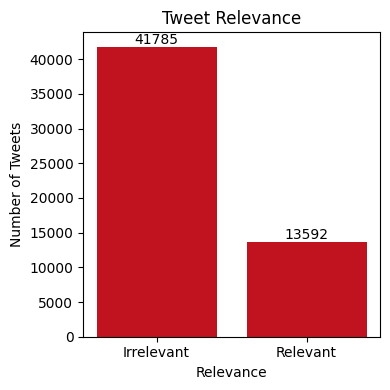

In [ ]:
# Count relevant and irrelevant tweets
relevance_counts = english_tweets_relevant['is_relevant'].value_counts().sort_index()

labels = relevance_counts.index.map({0: 'Irrelevant', 1: 'Relevant'})
values = relevance_counts.values

plt.figure(figsize=(4, 4))
bars = plt.bar(labels, values, color='#C1121F')  # Red bars

# Add value labels on top of each bar
for bar, count in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, str(count),
             ha='center', va='bottom', fontsize=10)

plt.title("Tweet Relevance")
plt.xlabel("Relevance")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

In [ ]:
# Filter to keep only relevant tweets
english_tweets_relevant = english_tweets_relevant[english_tweets_relevant['is_relevant'] == 1]

# Drop the 'is_relevant' column
english_tweets_relevant = english_tweets_relevant.drop(columns=['is_relevant'])

# Save as csv
english_tweets_relevant.to_csv("english_tweets_relevant.csv", index=False)

## 3.3 Create Copies for Different Preprocessing Steps
Two identical copies of the cleaned dataset are created for different data preprocessing steps in topic modeling and sentiment analysis.

In [ ]:
# Create two identical copies of the cleaned data
data_for_eda = english_tweets_relevant.copy()
data_for_topic = english_tweets_relevant.copy()

## 3.4 Data Preprocessing for Model Fitting


### 3.4.1 For EDA

Before conducting Exploratory Data Analysis (EDA), we performed a series of data cleaning steps. First, we converted all text to **lowercase** to avoid treating words like "Rednote" and "rednote" as different tokens. We **removed URLs** because they carry no meaningful semantic content and can interfere with keyword frequency analysis. **Removing stopwords** helped highlight the core vocabulary in the dataset by filtering out commonly used, non-informative words. Lastly, we applied **lemmatization and stemming** to reduce words to their root forms.

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # WordNet morphological database

# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define text cleaning function (for topic modeling)
def clean_tokens_for_eda(text):
    if not isinstance(text, str):
        return []

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)

    # 3. Remove emoji characters
    text = re.sub(r"[\U00010000-\U0010ffff]", "", text)

    # 4. Extract words (keep only alphabetic tokens)
    tokens = re.findall(r'\b[a-z]+\b', text)

    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 6. Lemmatization + Stemming
    processed_tokens = []
    for word in tokens:
        lemma = lemmatizer.lemmatize(word)     # Lemmatization
        stem = stemmer.stem(lemma)             # Stemming
        processed_tokens.append(stem)

    return processed_tokens

[nltk_data] Downloading package stopwords to C:\Users\Sherlock
[nltk_data]     Pi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sherlock
[nltk_data]     Pi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Sherlock
[nltk_data]     Pi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Apply the cleaning function to your dataset
data_for_eda['clean_tokens'] = data_for_eda['Text'].apply(clean_tokens_for_eda)

# Preview the original text alongside the cleaned token list
data_for_eda[['Text', 'clean_tokens']].head()

Text  \
1                                                                                                                                                                                                                                  America is so weird I might just install RedNote and DeepSeek (I won't 🤣)   
5                                                                                                                                                                                                                                              I love the aesthetics of rednote. everything is so peaceful 🥹   
10                                                              @SirOstapBender @mrpxssy @Gompers_Stomper @how_do_i_pdf I do have a rednote but I’m mainly using that to learn Chinese &amp; find out about Chinese movies. They’re really kind &amp; wholesome there &amp; I want to stay in good favor lol   
19  Traveling to China just got easier. Thanks to a surge in RedNote users, major travel apps like Amap and Baidu Maps now offer English support. No more guesswork—just seamless navigation. Would you use these apps on your trip? #travel #traveltok #china #rednote #amap #baidu https://t.co/y2eif7VvUI   
20                                                                                                                               @louffyDG …the “sis” one currently boo not to discredit your indentity fyi…also Xiaohongshu ( Rednote) got me hyped lol they call every sister no matter gender. I love it.   

                                                                                                                                                                                                                      clean_tokens  
1                                                                                                                                                                                [america, weird, might, instal, rednot, deepseek]  
5                                                                                                                                                                                           [love, aesthet, rednot, everyth, peac]  
10                                                                            [sirostapbend, mrpxssi, rednot, mainli, use, learn, chines, amp, find, chines, movi, realli, kind, amp, wholesom, amp, want, stay, good, favor, lol]  
19  [travel, china, got, easier, thank, surg, rednot, user, major, travel, app, like, amap, baidu, map, offer, english, support, guesswork, seamless, navig, would, use, app, trip, travel, traveltok, china, rednot, amap, baidu]  
20                                                                                 [louffydg, si, one, current, boo, discredit, indent, fyi, also, xiaohongshu, rednot, got, hype, lol, call, everi, sister, matter, gender, love]

### 3.4.2 For Topic Modeling

For topic modeling, data cleaning only requires lowercasing and removing URLs. Since the goal is to uncover semantic themes, we intentionally **avoid over-cleaning** such as stop words, emojis and original word forms are preserved without stemming or lemmatization. This is to prevent the loss of key contextual information that could be crucial for identifying meaningful topics.


In [ ]:
# Define preprocessing function (username and link placeholders)
def preprocessing_for_topic_modeling(text):
    if not isinstance(text, str):
        return ""

    # Lowercase the text (optional, depending on model requirements)
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\.\S+", "", text)

    new_text = []
    for t in str(text).split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        new_text.append(t)

    return " ".join(new_text)

# Apply preprocessing to your dataset
data_for_topic = data_for_topic.dropna(subset=['Text']).copy()
data_for_topic['preprocessed_text'] = data_for_topic['Text'].apply(preprocessing_for_topic_modeling)

# Preview preprocessed text
data_for_topic[['Text', 'preprocessed_text']].head()

Text  \
1                                                                                                                                                                                                                                  America is so weird I might just install RedNote and DeepSeek (I won't 🤣)   
5                                                                                                                                                                                                                                              I love the aesthetics of rednote. everything is so peaceful 🥹   
10                                                              @SirOstapBender @mrpxssy @Gompers_Stomper @how_do_i_pdf I do have a rednote but I’m mainly using that to learn Chinese &amp; find out about Chinese movies. They’re really kind &amp; wholesome there &amp; I want to stay in good favor lol   
19  Traveling to China just got easier. Thanks to a surge in RedNote users, major travel apps like Amap and Baidu Maps now offer English support. No more guesswork—just seamless navigation. Would you use these apps on your trip? #travel #traveltok #china #rednote #amap #baidu https://t.co/y2eif7VvUI   
20                                                                                                                               @louffyDG …the “sis” one currently boo not to discredit your indentity fyi…also Xiaohongshu ( Rednote) got me hyped lol they call every sister no matter gender. I love it.   

                                                                                                                                                                                                                                                                    preprocessed_text  
1                                                                                                                                                                                                           america is so weird i might just install rednote and deepseek (i won't 🤣)  
5                                                                                                                                                                                                                       i love the aesthetics of rednote. everything is so peaceful 🥹  
10                                                                       @user @user @user @user i do have a rednote but i’m mainly using that to learn chinese &amp; find out about chinese movies. they’re really kind &amp; wholesome there &amp; i want to stay in good favor lol  
19  traveling to china just got easier. thanks to a surge in rednote users, major travel apps like amap and baidu maps now offer english support. no more guesswork—just seamless navigation. would you use these apps on your trip? #travel #traveltok #china #rednote #amap #baidu   
20                                                                                                            @user …the “sis” one currently boo not to discredit your indentity fyi…also xiaohongshu ( rednote) got me hyped lol they call every sister no matter gender. i love it.

# 4. EDA

In the EDA phase, we focused on three main aspects: **the temporal trends in post volume, the distribution of posts across different media types, and the frequency distribution of key terms within the post content**.


In [ ]:
data_for_eda.info()
data_for_eda.describe(include='all').round(2)

<class 'pandas.core.frame.DataFrame'>
Index: 13592 entries, 1 to 55374
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Release_time        13592 non-null  datetime64[ns]
 1   Number_of_likes     13592 non-null  object        
 2   Number_of_comments  13592 non-null  object        
 3   Number_of_forwards  13592 non-null  float64       
 4   Text                13592 non-null  object        
 5   Media_type          13592 non-null  object        
 6   clean_tokens        13592 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 849.5+ KB


Release_time  Number_of_likes  Number_of_comments  \
count                           13592          13592.0             13592.0   
unique                            NaN            287.0                78.0   
top                               NaN              0.0                 0.0   
freq                              NaN           6499.0              9458.0   
mean    2025-01-21 03:50:31.151854080              NaN                 NaN   
min               2025-01-17 15:38:31              NaN                 NaN   
25%     2025-01-18 19:08:46.249999872              NaN                 NaN   
50%               2025-01-19 13:09:07              NaN                 NaN   
75%        2025-01-20 18:21:35.500000              NaN                 NaN   
max               2025-02-12 23:40:48              NaN                 NaN   
std                               NaN              NaN                 NaN   

        Number_of_forwards  \
count             13592.00   
unique                 NaN   
top                    NaN   
freq                   NaN   
mean                  3.66   
min                   0.00   
25%                   0.00   
50%                   0.00   
75%                   0.00   
max                4944.00   
std                  73.90   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Text  \
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       13592   
unique                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      13592   
top     @GeorgeMasonU \nI understand that you have a Chinese language lecturer who is encouraging students to use the PRC malware app Rednote.  Rednote is tracking every interaction with the app to optimize the algorithm— utilizing advanced face and object detection technology. This means it is analyzing both you and your surroundings a possible violation of Virginia state privacy laws (Va. Code §  59.1-578). The processing of sensitive data also triggers the obligation  to conduct and document a data protection assessment (Va. Code §  59.1-580).\nhttps://t.co/9E4cgUOsCW   
freq                                                                                                                                                                                                                                                                                                                                                                                                               

As illustrated in Figure Tweet Volume by Day, the volume of posts followed a pattern of rising initially, then dropping sharply and remaining at a relatively low level, reflecting the nature of “TikTok Refugee” as a **short-lived trend** on social media. Notably, the number of posts **peaked on 19 January 2025,** which, based on external sources, can be attributed to TikTok experiencing a service outage on that day (The Conversation, 2024). This observation is consistent with findings reported in The Conversation, which highlighted the same cause of the surge in posts during that period.

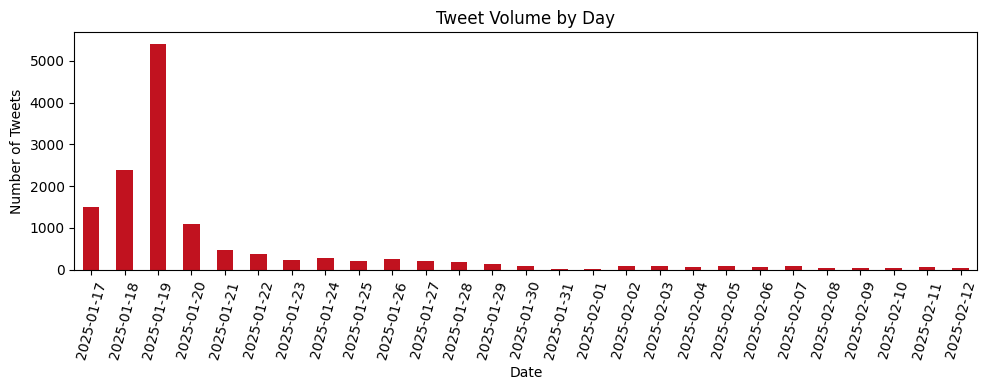

In [ ]:
# Group by date only (drop time) and count tweets
tweet_volume_by_day = data_for_eda['Release_time'].dt.date.value_counts().sort_index()

plt.figure(figsize=(10, 4))
tweet_volume_by_day.plot(kind='bar', color='#C1121F')
plt.title("Tweet Volume by Day")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

We analyzed the distribution of `media types` in the dataset and identified four distinct categories: text, photo, video, and "animated_gif". As shown in the bar chart, text posts overwhelmingly dominate the dataset, with a significantly higher count compared to the other media types.

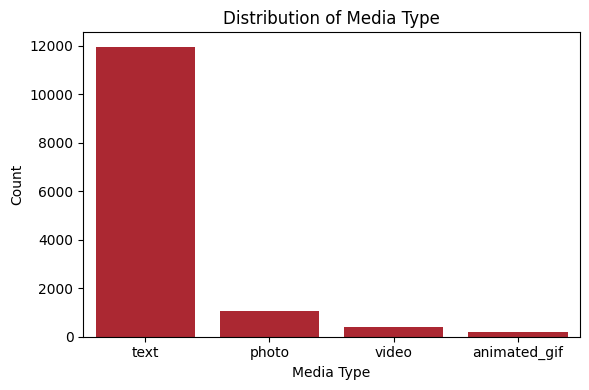

In [ ]:
# Plot media type distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data_for_eda, x='Media_type', order=data_for_eda['Media_type'].value_counts().index, color='#C1121F')
plt.title("Distribution of Media Type")
plt.xlabel("Media Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In terms of content analysis, we first analyzed the frequency distribution of tokens derived from the cleaned text data. As presented in Figure Top 20 Most Common Words and Figure Word Cloud of Most Frequent Words in Tweets, the top five most frequent tokens were rednot, tiktok, chinese, people, china. It aligns with our expectations, given the theme of the dataset. To provide a more intuitive understanding, we generated a word cloud visualizing the high-frequency terms across all posts.

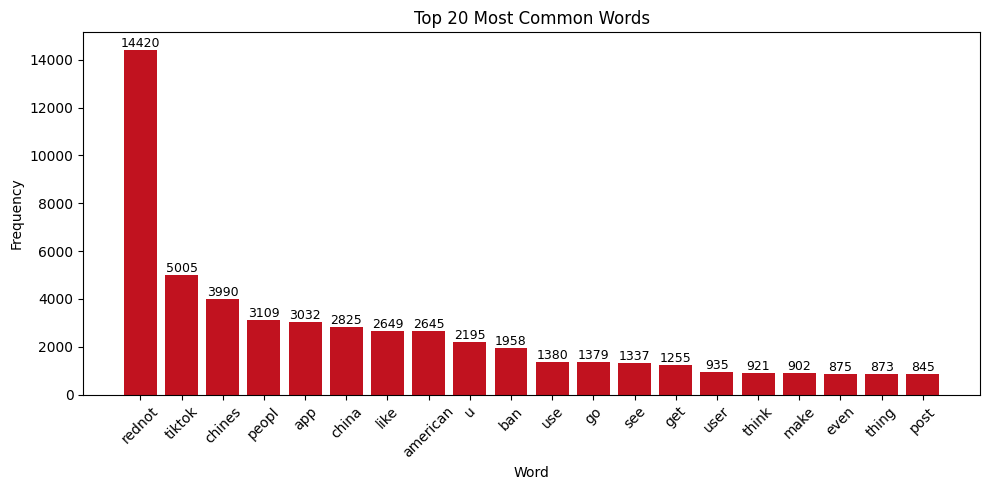

In [ ]:
# Flatten the list of tokens into a single list
all_tokens = [token for tokens in data_for_eda['clean_tokens'] for token in tokens]

# Count word frequencies
word_freq = Counter(all_tokens)
top_20 = word_freq.most_common(20)

# Prepare data
words, counts = zip(*top_20)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(words, counts, color='#C1121F')

# Add value labels on top of bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(count),
             ha='center', va='bottom', fontsize=9)

plt.title("Top 20 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

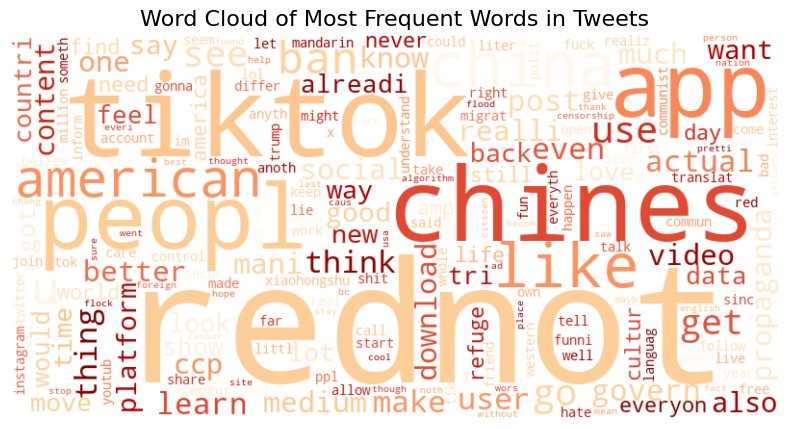

In [ ]:
# Generate the word cloud with red colormap
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='OrRd'
).generate_from_frequencies(word_freq)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words in Tweets", fontsize=16)
plt.show()

As shown in Figure Distribution of Token Counts per Tweet, the distribution of token counts per tweet is right-skewed, with most posts containing 5 to 25 tokens and peaking around 18–20.


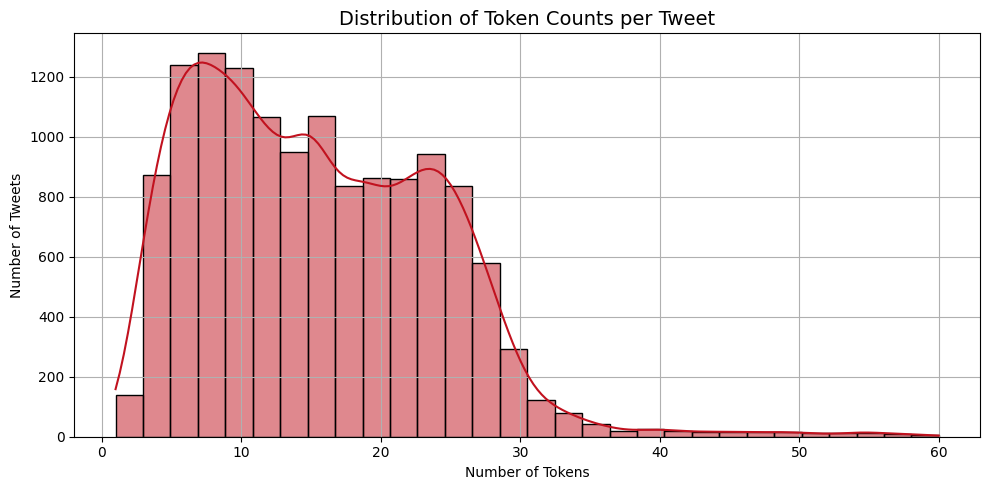

In [ ]:
# Calculate token count per tweet
data_for_eda['token_count'] = data_for_eda['clean_tokens'].apply(len)

# Filter tweets with <= 60 tokens
filtered_df = data_for_eda[data_for_eda['token_count'] <= 60]

# Plot histogram with KDE (smoothed curve)
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['token_count'], bins=30, color='#C1121F', edgecolor='black', kde=True)

plt.title("Distribution of Token Counts per Tweet", fontsize=14)
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.tight_layout()
plt.show()

As shown in the log-transformed distributions of likes, comments and forwards, user engagement is highly right-skewed—most tweets receive minimal interaction with only a small fraction generating significant attention.


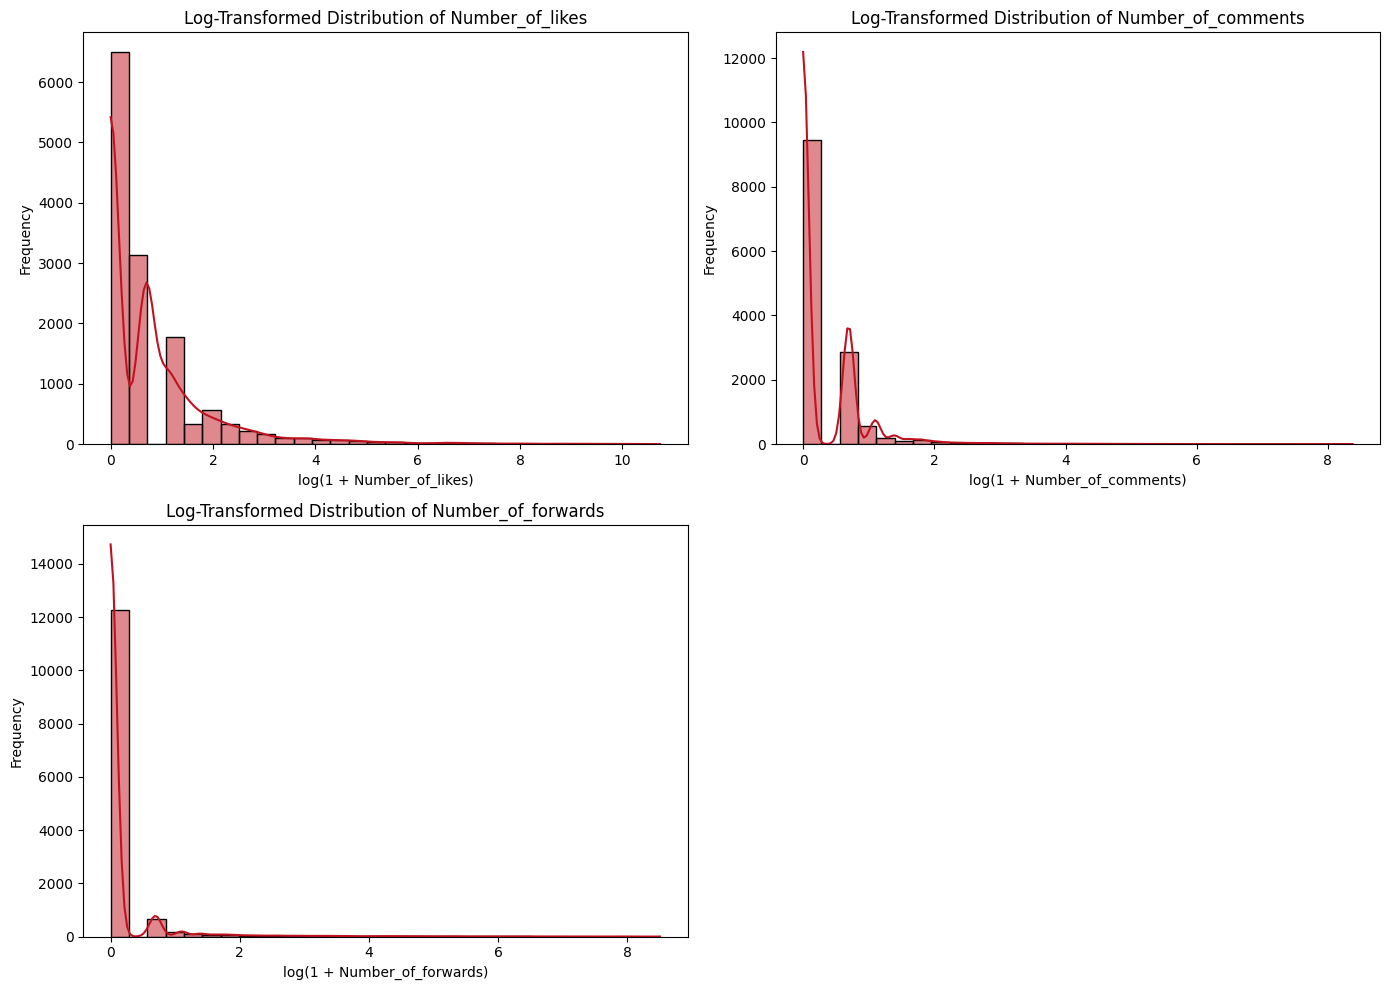

In [ ]:
numeric_cols = ['Number_of_likes', 'Number_of_comments', 'Number_of_forwards']

# Plot histograms for numeric columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)

    numeric_data = pd.to_numeric(data_for_eda[col], errors='coerce').dropna()

    # Add 1 to avoid log(0)
    sns.histplot(np.log1p(numeric_data), bins=30, kde=True, color='#C1121F')
    plt.title(f'Log-Transformed Distribution of {col}')
    plt.xlabel(f'log(1 + {col})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5. Topic Modeling

## 5.1 Method 1.Text Vectorization Clustering

To uncover major topics of user discussions around RedNote, we first employed a **text clustering** approach using **sentence embeddings and unsupervised learning.** Specifically, we used the **'all-MiniLM-L6-v2'** model from SentenceTransformers to convert each tweet into a dense vector representation. This model is well-suited for short-text tasks like tweets due to its efficient architecture and strong semantic understanding despite its compact size.

Next, we applied **K-Means clustering** to group semantically similar tweets. To determine the optimal number of clusters (k), we combined both the **elbow method and the silhouette score**, which suggested that **k=4** provides the best trade-off between compactness and separation

To generate meaningful summaries for each cluster, we used the DeepSeek-V3 large language model API, feeding it the full set of posts in each cluster and prompting it to generate a high-level topic description. The resulting cluster topics are:

*   Cluster 0: Migration of users from TikTok to RedNote due to TikTok's ban in the US, highlighting **cultural exchanges and RedNote's growing popularity** as an alternative platform.
*   Cluster 1: Various experiences, opinions, and trends related to the RedNote app, including its **features, user interactions, cultural differences, and platform policies**.
*   Cluster 2: Migration of American users from TikTok to RedNote, highlighting concerns about **Chinese propaganda, censorship, and the political implications** of this shift.

*   Cluster 3: Various opinions and concerns about the RedNote app, including **censorship, national security threats, comparisons to other social media platforms, and user experiences**


The four clusters reflect distinct themes, but several are **heavily influenced by political and ideological discourse**, such as concerns about state control, censorship, and propaganda. While this highlights the **geopolitical sensitivity** surrounding RedNote, it also means that functional, product-related feedback is easily diluted or overshadowed. To address this, the next step focuses on **Keyword-Guided Filtering** to actively extract posts related to app features and user experience—enabling a more targeted analysis of RedNote's perceived functionality.



In [ ]:
# Load the model
embed_model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the cleaned text
texts = data_for_topic['preprocessed_text'].tolist()
embeddings = embed_model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/425 [00:00<?, ?it/s]

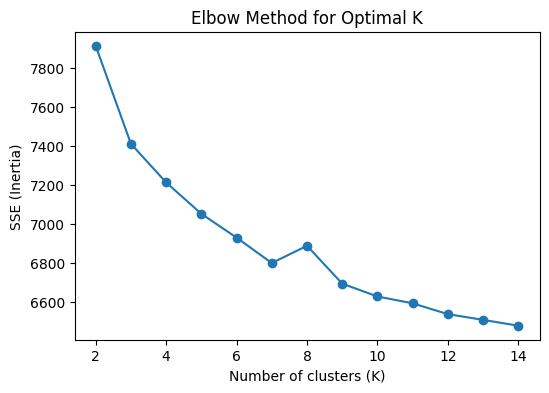

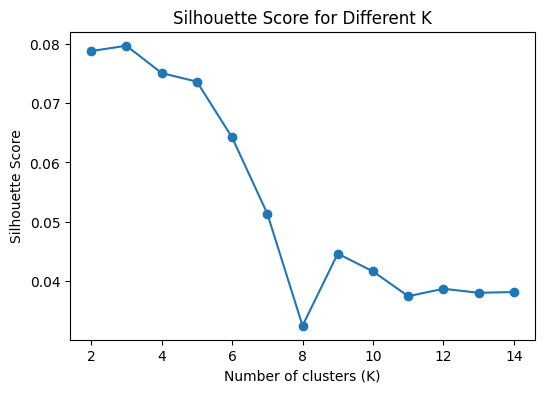

In [ ]:
sse = []
silhouette_scores = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embeddings, labels))

# Elbow Plot
plt.figure(figsize=(6, 4))
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.show()

# Silhouette Plot
plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

data_for_topic['cluster'] = cluster_labels

In [ ]:
print(data_for_topic['cluster'].value_counts())

for c in sorted(data_for_topic['cluster'].unique()):
    print(f"\n🔹 Examples from Cluster {c}:")
    examples = data_for_topic[data_for_topic['cluster'] == c]['Text'].sample(3, random_state=42).tolist()
    for e in examples:
        print("•", e)

cluster
2    4202
0    3840
1    3612
3    1938
Name: count, dtype: int64

🔹 Examples from Cluster 0:
• @sogdianasuli Luigi's global appeal is no surprise! Speaking of cross-platform popularity, Opencord AI makes switching from TikTok to Rednote a breeze – keeping your content game strong across borders.
• Everyone leaving Rednote as soon as TikTok started working again https://t.co/ja0PxGX9XT
• @01007Pi Tiktok to rednote migration speaks volumes

🔹 Examples from Cluster 1:
• THE REDNOTE PROFILE CUSTOMIZATION IS SO FIRE https://t.co/HZbEZ4muVV
• Filters on Rednote are trash 
My catfishing days are over
• i love rednote so much https://t.co/qUebDtf3f8

🔹 Examples from Cluster 2:
• @libsoftiktok American TikTokers are moving to RedNote, facing Chinese state-controlled content that often paints an overly positive picture of life in China. This has raised concerns about propaganda exposure.
• @TaraBull808 They are and it's not a lie.
Rednote is their headache now.
If these leaders were not

In [ ]:
def save_api_key_to_txt(api_key, file_path="deepseek_api_key.txt"):

    try:
        with open(file_path, "w") as f:
            f.write(api_key.strip())
        print(f"API key successfully saved to '{file_path}'")
    except Exception as e:
        print(f"Failed to save API key: {e}")

save_api_key_to_txt("sk-1d81ee366fca49acaf498458e3bcc669")

API key successfully saved to 'deepseek_api_key.txt'


In [ ]:
# Read the API key
with open("deepseek_api_key.txt", "r") as f:
    api_key = f.read().strip()

# Configure DeepSeek API
openai.api_key = api_key
openai.api_base = "https://api.deepseek.com/v1"

def summarize_cluster_theme(texts, model="deepseek-chat"):
    joined = "\n".join([f"- {t}" for t in texts])

    system_prompt = (
        "You are a helpful assistant who summarizes the main topic of a group of tweets. "
        "Each tweet discusses the same theme related to the RedNote app (a Chinese social media platform)."
    )

    user_prompt = (
        f"Here is a group of tweets:\n\n{joined}\n\n"
        "Please summarize the main topic they are discussing. Respond with one sentence in English."
    )

    try:
        client = openai.OpenAI(api_key=api_key, base_url=openai.api_base)

        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}
            ],
            temperature=0.2
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error: {e}")
        return "Error"

In [ ]:
topic_summaries = {}

for c in sorted(data_for_topic['cluster'].unique()):
    print(f"\nSummarizing Cluster {c}...")

    # Randomly select 10 tweets from the cluster (or all if fewer than 10)
    cluster_texts = data_for_topic[data_for_topic['cluster'] == c]['Text'].sample(
        min(10, len(data_for_topic[data_for_topic['cluster'] == c])),
        random_state=42
    ).tolist()

    summary = summarize_cluster_theme(cluster_texts)
    topic_summaries[c] = summary
    print(f"Cluster {c} Topic: {summary}")


Summarizing Cluster 0...
Cluster 0 Topic: The tweets discuss the migration of users from TikTok to RedNote due to TikTok's ban in the US, highlighting cultural exchanges and RedNote's growing popularity as an alternative platform.

Summarizing Cluster 1...
Cluster 1 Topic: The tweets are discussing various experiences, opinions, and trends related to the RedNote app, including its features, user interactions, cultural differences, and platform policies.

Summarizing Cluster 2...
Cluster 2 Topic: The tweets are discussing the migration of American users from TikTok to RedNote, highlighting concerns about Chinese propaganda, censorship, and the political implications of this shift.

Summarizing Cluster 3...
Cluster 3 Topic: The tweets are discussing various opinions and concerns about the RedNote app, including censorship, national security threats, comparisons to other social media platforms, and user experiences.


## 5.2 Method 2.Keyword Guided Filtering

To actively extract tweets related to **user experience and product features**, we defined a set of **feature/UX-related keywords** (e.g., “feature”, “translate”, “filter”, “recommend”, “UX”) and applied regular expression matching for a second-round filtering. This process retained approximately **45%** of the tweets, which were then vectorized and clustered using K-Means, following the same steps as before. The elbow method and silhouette score indicated **k=3** as the optimal number of clusters. A 2D PCA plot of the clustered data shows clear separation between clusters, suggesting distinct user focus areas within functional discussions.

The resulting topics were:

*   Cluster 0: Americans' reactions to discovering and engaging with the Chinese social media platform RedNote, highlighting **cultural differences, misconceptions about China, and debates over freedom of speech and propaganda.**
*   Cluster 1: TikTok ban in the US and users migrating to the Chinese-owned app RedNote, with mixed reactions about its **safety and cultural implications.**
*   Cluster 2: Growing popularity and mixed opinions about the RedNote app, with some users **praising its content while others criticize its policies and cultural impact.**


The three clusters show partial thematic overlap with earlier results, but this time with a sharper focus on functional engagement, such as platform comparison, algorithm impressions, and early user experiences. However, political and ideological concerns still surface, suggesting that even feature-related discourse is often entangled with broader geopolitical narratives. This time we retained these topics this time because they demonstrate relevance to the overall user experience.


In [ ]:
# Feature/experience-related keywords (can be customized and expanded)
feature_keywords = ["feature", "translate", "filter", "recommend",
                    "search", "algorithm", "privacy", "ban",
                    "interface", "community", "feedback",
                    "UX", "design", "lag", "ad", "bug", "report"]

# Match keywords
mask = data_for_topic['preprocessed_text'].str.contains('|'.join(feature_keywords), case=False, na=False)

# Get a subset focused on user experience and functionality
feature_df = data_for_topic[mask].copy()

In [ ]:
embed_model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed the functional/feature-related tweet texts
feature_embeddings = embed_model.encode(feature_df['preprocessed_text'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/175 [00:00<?, ?it/s]

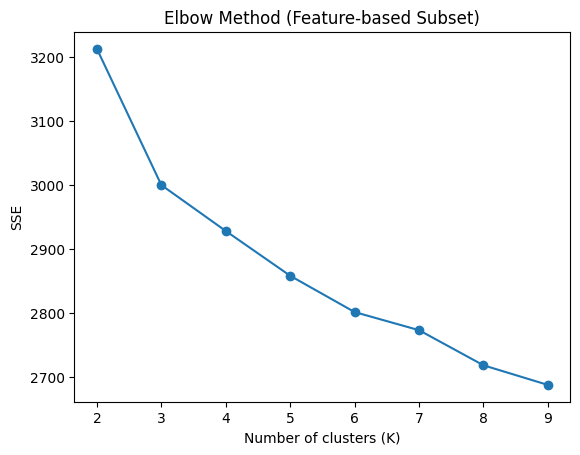

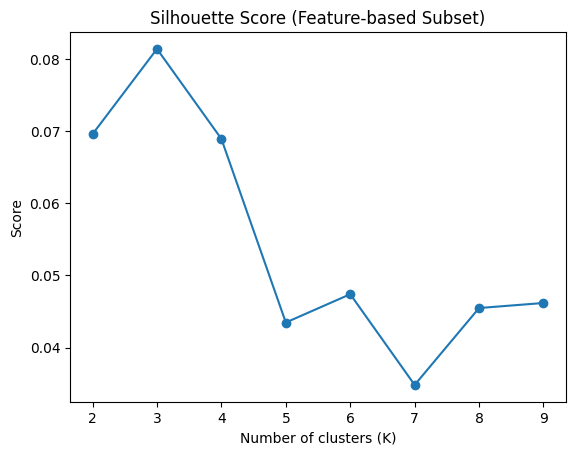

In [ ]:
sse = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(feature_embeddings)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(feature_embeddings, labels))

# Visualize Elbow Method
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method (Feature-based Subset)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE")
plt.show()

# Visualize Silhouette Scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score (Feature-based Subset)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
feature_cluster_labels = kmeans.fit_predict(feature_embeddings)
feature_df['cluster'] = feature_cluster_labels

In [ ]:
print(feature_df['cluster'].value_counts())

for c in sorted(feature_df['cluster'].unique()):
    print(f"\n Examples from Cluster {c}:")
    examples = feature_df[feature_df['cluster'] == c]['Text'].sample(3, random_state=42).tolist()
    for e in examples:
        print("•", e)

cluster
1    2181
2    1872
0    1535
Name: count, dtype: int64

🔹 Examples from Cluster 0:
• @badazn I grew up in Bulgaria - in a communist regime where we were materially better off than the Chinese on RedNote now and where we had more freedom of speech than the people in the UK nowadays. We brought it down. We wanted this last pinch of official freedom. Regimes suck.
• @acoastwalker @RpsAgainstTrump It was eye opening as a canadian to see the american reaction to joining rednote. They genuinely thought China was paper shacks and abject poverty
• western cosplayers migrating to xhs (rednote) and crying about being bashed... china's cosplay standards are extremely high and the community there is very brutal... if you can't handle backlash (sometimes it's not even considered criticism) it's not the right place for you 😭

🔹 Examples from Cluster 1:
• It’s my understanding that the newly returned Tik Tok is giving 

Stepford Wives 😐

I will not be going back at all ! I’ll stick with Red 

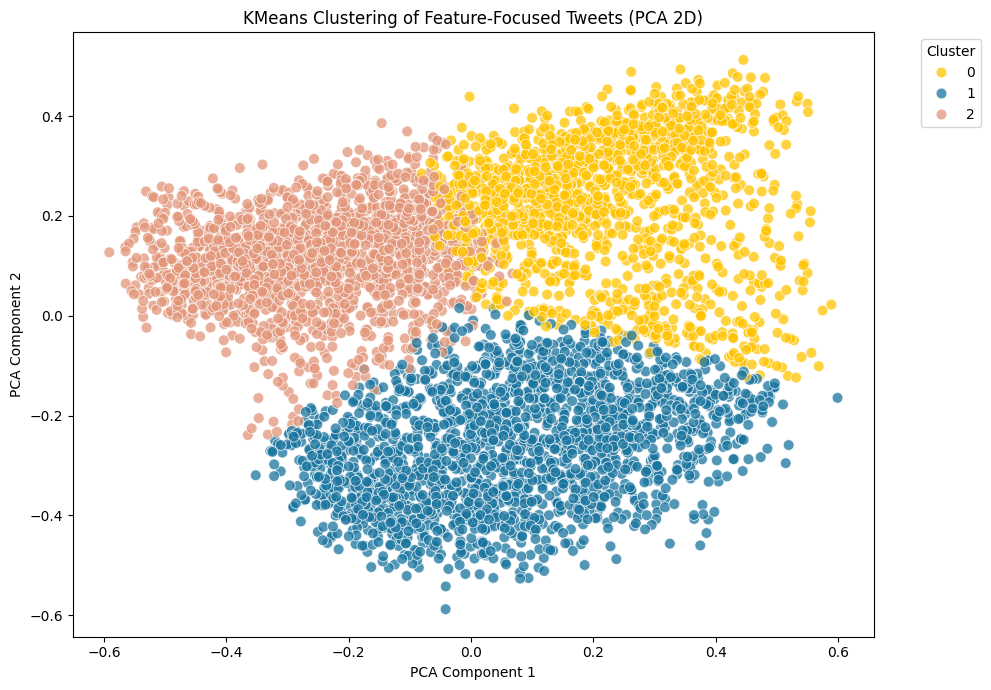

In [ ]:
# Reduce dimensions with PCA
pca = PCA(n_components=2, random_state=42)
pca_embeddings = pca.fit_transform(feature_embeddings)

# Add the 2D PCA coordinates to your DataFrame
feature_df['x'] = pca_embeddings[:, 0]
feature_df['y'] = pca_embeddings[:, 1]

# Visualize the clusters with a scatter plot using custom colors
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=feature_df,
    x='x', y='y',
    hue='cluster',
    palette=["#ffc300", "#1a759f", "#e29578"],
    s=60,
    alpha=0.75
)
plt.title("KMeans Clustering of Feature-Focused Tweets (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
feature_cluster_summaries = {}

for c in sorted(feature_df['cluster'].unique()):
    print(f"\nSummarizing Feature Cluster {c}...")

    cluster_texts = feature_df[feature_df['cluster'] == c]['Text'].sample(
        min(10, len(feature_df[feature_df['cluster'] == c])), random_state=42).tolist()

    summary = summarize_cluster_theme(cluster_texts)
    feature_cluster_summaries[c] = summary
    print(f"Cluster {c} Topic: {summary}")


Summarizing Feature Cluster 0...
Cluster 0 Topic: The tweets discuss Americans' reactions to discovering and engaging with the Chinese social media platform RedNote, highlighting cultural differences, misconceptions about China, and debates over freedom of speech and propaganda.

Summarizing Feature Cluster 1...
Cluster 1 Topic: The tweets discuss the TikTok ban in the US and users migrating to the Chinese-owned app RedNote, with mixed reactions about its safety and cultural implications.

Summarizing Feature Cluster 2...
Cluster 2 Topic: The tweets are discussing the growing popularity and mixed opinions about the RedNote app, with some users praising its content while others criticize its policies and cultural impact.


In [ ]:
for i in sorted(feature_df['cluster'].unique()):
    if i == -1:
        continue  # Skip the noise cluster if present
    print(f"\n🔷 Examples from Cluster {i}:")
    samples = feature_df[feature_df['cluster'] == i]['Text'].sample(5, random_state=42).tolist()
    for s in samples:
        print("•", s)


🔷 Examples from Cluster 0:
• @badazn I grew up in Bulgaria - in a communist regime where we were materially better off than the Chinese on RedNote now and where we had more freedom of speech than the people in the UK nowadays. We brought it down. We wanted this last pinch of official freedom. Regimes suck.
• @acoastwalker @RpsAgainstTrump It was eye opening as a canadian to see the american reaction to joining rednote. They genuinely thought China was paper shacks and abject poverty
• western cosplayers migrating to xhs (rednote) and crying about being bashed... china's cosplay standards are extremely high and the community there is very brutal... if you can't handle backlash (sometimes it's not even considered criticism) it's not the right place for you 😭
• I don’t have the desire to download Red Note, but loving that Americans are realizing that China is a whole different world.

#RedNote #china
• @TheBabylonBee My favorite part of all this is the 3D printed gun community going on r

## 5.3 Method 3.GPT based Relevance Classifier

Compared to keyword-based filtering, this method leveraged the **DeepSeek-V3 API** to perform a more flexible, semantic-level classification of tweets related to ecosystem and feature experience. Instead of rigid keyword matching, **the model was prompted to assess the relevance of each post**. However, despite its nuanced understanding, the GPT-based approach still struggled to fully eliminate irrelevant content, and the process proved to be **computationally expensive and time-consuming**. (For 500 posts it needs 1 hour to filter)

Finally we select **Keyword-Guided Filtering** as the appropriate method for topic modeling.



In [ ]:
# Read the API key
with open("deepseek_api_key.txt", "r") as f:
    api_key = f.read().strip()

# Configure DeepSeek API
openai.api_key = api_key
openai.api_base = "https://api.deepseek.com/v1"

# Define the function to do soft filtering
def gpt_relevance_classify(text, model="deepseek-chat"):
    try:
        client = openai.OpenAI(api_key=openai.api_key, base_url=openai.api_base)

        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "You are an assistant that judges whether tweets are about RedNote's features, user experience, content or community."},
                {"role": "user", "content": f"Tweet: \"{text}\"\n\nIs this tweet a feedback or comment about RedNote's user experience, features, content or community? Reply 'Relevant' or 'Irrelevant' only."}
            ],
            temperature=0.0,
        )

        return response.choices[0].message.content.strip()
    except Exception as e:
        print("Error:", e)
        return "Error"

In [ ]:
tqdm.pandas()

# Random select 500 posts
sample_500 = data_for_topic.sample(500, random_state=42).copy()

In [ ]:
def gpt_relevance_safe(text, delay=1.0):
    time.sleep(delay)
    return gpt_relevance_classify(text)

sample_500['gpt_relevance'] = sample_500['Text'].progress_apply(gpt_relevance_safe)

100%|██████████| 500/500 [55:45<00:00,  6.69s/it]


gpt_relevance
Relevant      304
Irrelevant    196
Name: count, dtype: int64


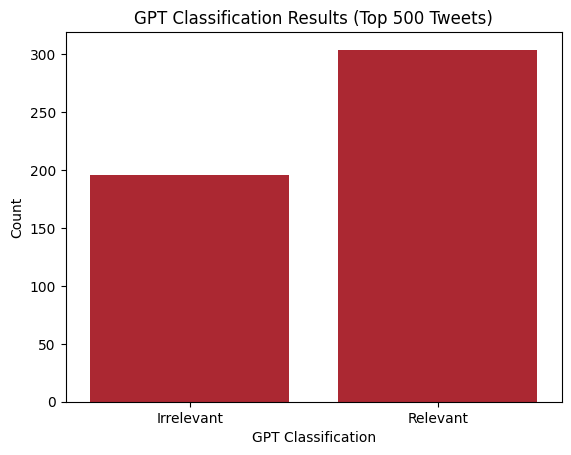

In [ ]:
# Clean the data by keeping only valid classification results
sample_500 = sample_500[sample_500['gpt_relevance'].isin(['Relevant', 'Irrelevant'])].copy()

# Classification count
print(sample_500['gpt_relevance'].value_counts())

# Plot classification results
sns.countplot(data=sample_500, x='gpt_relevance', color='#C1121F')
plt.title("GPT Classification Results (Top 500 Tweets)")
plt.xlabel("GPT Classification")
plt.ylabel("Count")
plt.show()

In [ ]:
relevant_df = sample_500[sample_500['gpt_relevance'] == 'Relevant'].copy()
texts = relevant_df['Text'].tolist()

embed_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embed_model.encode(texts, show_progress_bar=True)

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

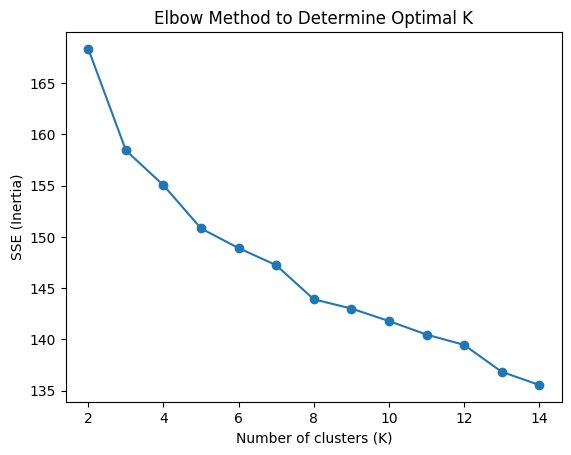

In [ ]:
sse = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    sse.append(kmeans.inertia_)

plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

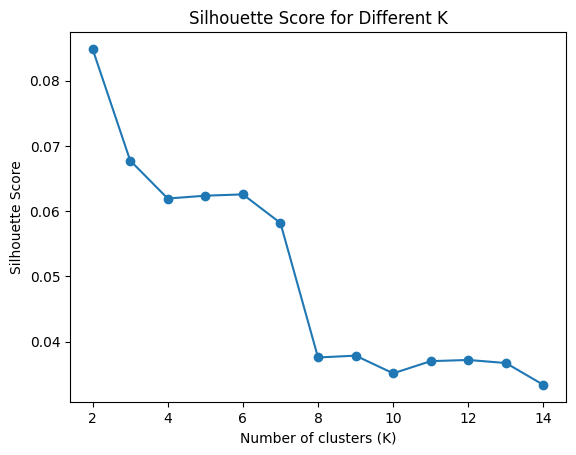

In [ ]:
scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)
relevant_df['cluster'] = cluster_labels

In [ ]:
print(relevant_df['cluster'].value_counts())

cluster
0    179
1    125
Name: count, dtype: int64


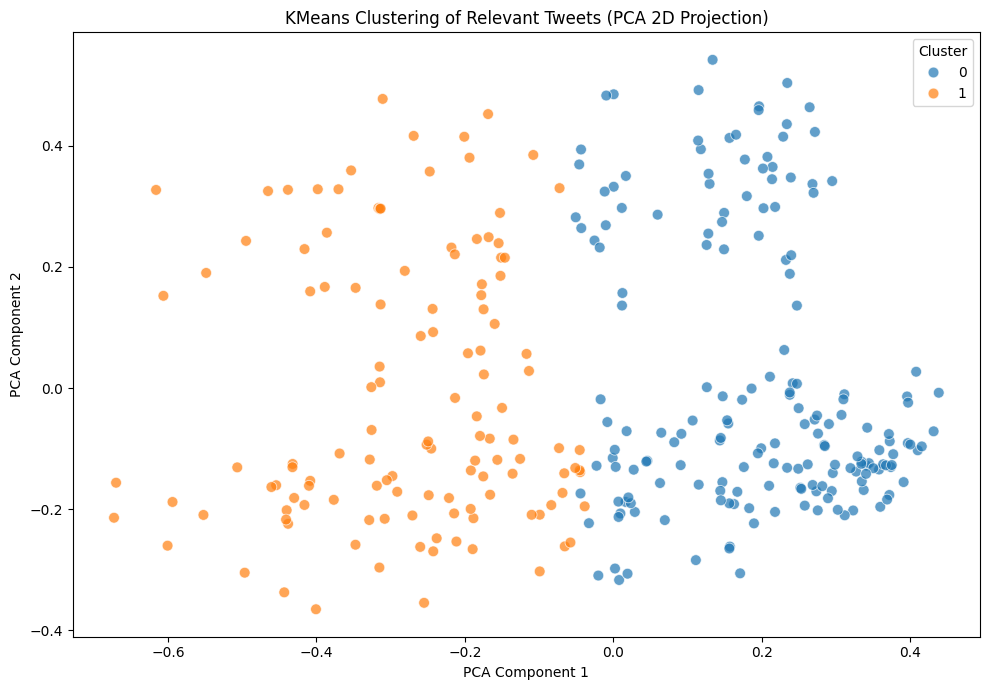

In [ ]:
# Step 1: PCA dimensionality reduction to 2D
pca = PCA(n_components=2, random_state=42)
pca_embeddings = pca.fit_transform(embeddings)  # embeddings are the vectors you generated earlier

# Step 2: Add the reduced dimensions to the DataFrame
relevant_df['x'] = pca_embeddings[:, 0]
relevant_df['y'] = pca_embeddings[:, 1]

# Step 3: Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=relevant_df,
    x='x', y='y',
    hue='cluster',
    palette='tab10',
    alpha=0.7,
    s=60
)
plt.title("KMeans Clustering of Relevant Tweets (PCA 2D Projection)")
plt.legend(title='Cluster')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()

In [ ]:
for c in sorted(relevant_df['cluster'].unique()):
    print(f"\n🔹 Examples from Cluster {c}:")
    examples = relevant_df[relevant_df['cluster'] == c]['Text'].sample(3, random_state=42).tolist()
    for e in examples:
        print("•", e)


🔹 Examples from Cluster 0:
• Honestly i like the rednote app lmao
• Finally my rednote homepage is good https://t.co/PaJQe5BlBb
• The Tankies are successfully radicalizing everyone who sees their posts. 

Seeing absolute stupidity of this shit gives me an inexplicable urge to start building the camps myself. 

I am startled by my own visceral reaction to the Rednote discourse. Idk man this is wild.

🔹 Examples from Cluster 1:
• @alexvinidiktov @CFDevelop In China? Because the CCP wants to control what its citizens see. It doesn’t want western influence. That’s why they have a separate app for China. And exactly why rednote is being walled off.
• @mikki807 I used to think this!! It broke my heart, honestly. Made me uncomfortable around people. Then I found Rednote and worldtok and discovered it’s MOSTLY selfish entitled AMERICANS that are that way. There’s really good caring people, just not HERE
• Psh I don't know what's real in China either dawg people on RedNote said people working 

In [ ]:
# Read the API key
with open("deepseek_api_key.txt", "r") as f:
    api_key = f.read().strip()

# Configure DeepSeek API
openai.api_key = api_key
openai.api_base = "https://api.deepseek.com/v1"

# Define the function to do soft filtering
def summarize_cluster_theme(texts, model="deepseek-chat"):
    joined = "\n".join([f"- {t}" for t in texts])

    system_prompt = (
        "You are a helpful assistant who summarizes the main topic of a group of tweets. "
        "Each tweet discusses the same theme related to the RedNote app (a Chinese social media platform)."
    )

    user_prompt = (
        f"Here is a group of tweets:\n\n{joined}\n\n"
        "Please summarize the main topic they are discussing. Respond with one sentence in English."
    )

    try:
        client = openai.OpenAI(api_key=openai.api_key, base_url=openai.api_base)

        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}
            ],
            temperature=0.2
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error for cluster: {e}")
        return "Error"

In [ ]:
cluster_summaries = {}

for c in sorted(relevant_df['cluster'].unique()):
    print(f"\nSummarizing Cluster {c}...")

    cluster_texts = relevant_df[relevant_df['cluster'] == c]['Text'].sample(
        min(10, len(relevant_df[relevant_df['cluster'] == c])), random_state=42).tolist()

    summary = summarize_cluster_theme(cluster_texts)
    cluster_summaries[c] = summary
    print(f"Cluster {c} Topic: {summary}")



Summarizing Cluster 0...
Cluster 0 Topic: The tweets are discussing the RedNote app, with mixed opinions on its content, propaganda concerns, censorship, and its comparison to other social media platforms.

Summarizing Cluster 1...
Cluster 1 Topic: The tweets are discussing the Chinese social media app RedNote, highlighting its differences from Western platforms, the cultural exchanges between Chinese and American users, and the varying perceptions of content and interactions on the app.


# 6. Sentiment Analysis

## 6.1 Processing Data and Running Analyses

Based on the clustering results from K-Means, we then performed **sentiment analysis** on each identified topic which allows us to assess whether user opinions were generally positive or negative within each thematic cluster.

First, we conducted a general sentiment analysis using the **twitter-roberta-base-sentiment** model provided by CardiffNLP on HuggingFace, which is specifically trained for analyzing sentiment in English tweets.  Furthermore, to gain a deeper understanding of users' emotional responses such as anger, joy or satisfaction, we performed an emotion analysis with **confidence scores.** This allowed us to better capture the nuanced emotional tone in each post or comment, providing richer insights into users' perceptions of their experience with RedNote.

While sentiment and emotion analysis help capture users' overall attitudes and feelings, some comments may contain additional layers of meaning. These include **offensive content** such as aggressive or hostile language targeting the platform or other users; **ironic remarks** where sarcasm distorts the surface sentiment and even hate speech, directed toward specific groups, cultures, or nationalities. By incorporating these additional dimensions into each topic, we are able to uncover more subtle, hidden emotions and attitudes that might otherwise be overlooked.

In [ ]:
# 1. Split the DataFrame by cluster label
cluster_0 = feature_df[feature_df['cluster'] == 0].copy()
cluster_1 = feature_df[feature_df['cluster'] == 1].copy()
cluster_2 = feature_df[feature_df['cluster'] == 2].copy()

In [ ]:
# 2. SENTIMENT ANALYSIS
task_sentiment = 'sentiment'
MODEL_sentiment = f"cardiffnlp/twitter-roberta-base-{task_sentiment}"
tokenizer_sentiment = AutoTokenizer.from_pretrained(MODEL_sentiment)
model_sentiment = AutoModelForSequenceClassification.from_pretrained(MODEL_sentiment)

# Download sentiment label mapping
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task_sentiment}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    lines = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(lines, delimiter='\t')
    sentiment_labels = [row[1] for row in csvreader if len(row) > 1]

def predict_sentiment(texts):
    results = []
    for text in tqdm(texts, desc="Predicting Sentiment"):
        encoded_input = tokenizer_sentiment(
            text,
            return_tensors='pt',
            truncation=True,
            max_length=128,
            padding='max_length'
        )
        with torch.no_grad():
            output = model_sentiment(**encoded_input)
        scores = softmax(output[0][0].numpy())
        label_id = np.argmax(scores)
        results.append(sentiment_labels[label_id])
    return results

# Apply sentiment prediction (using the 'preprocessed_text' column)
cluster_0['sentiment_label'] = predict_sentiment(cluster_0['preprocessed_text'])
cluster_1['sentiment_label'] = predict_sentiment(cluster_1['preprocessed_text'])
cluster_2['sentiment_label'] = predict_sentiment(cluster_2['preprocessed_text'])

Predicting Sentiment: 100%|██████████| 1872/1872 [02:37<00:00, 11.91it/s]


In [ ]:
# 3. EMOTION ANALYSIS (with confidence score)
task_emotion = 'emotion'
MODEL_emotion = f"cardiffnlp/twitter-roberta-base-{task_emotion}"
tokenizer_emotion = AutoTokenizer.from_pretrained(MODEL_emotion)
model_emotion = AutoModelForSequenceClassification.from_pretrained(MODEL_emotion)

# Download emotion label mapping
mapping_url_emotion = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task_emotion}/mapping.txt"
with urllib.request.urlopen(mapping_url_emotion) as f:
    lines = f.read().decode('utf-8').split("\n")
    emotion_labels = [line.split("\t")[1] for line in lines if line]

def get_emotion_with_score(text):
    if not isinstance(text, str) or text.strip() == "":
        return pd.Series(["neutral", 0.0])
    # Replace usernames and URLs
    text = ' '.join(['@user' if word.startswith('@') else 'http' if word.startswith('http') else word
                     for word in text.split()])
    encoded_input = tokenizer_emotion(
        text,
        return_tensors='pt',
        truncation=True,
        padding='max_length',
        max_length=512
    )
    with torch.no_grad():
        output = model_emotion(**encoded_input)
    scores = softmax(output.logits[0].detach().numpy())
    label_id = np.argmax(scores)
    return pd.Series([emotion_labels[label_id], float(scores[label_id])])

# Apply emotion analysis to the 'Text' column and get both the emotion and its score
cluster_0[['emotion', 'emotion_score']] = cluster_0['Text'].apply(get_emotion_with_score)
cluster_1[['emotion', 'emotion_score']] = cluster_1['Text'].apply(get_emotion_with_score)
cluster_2[['emotion', 'emotion_score']] = cluster_2['Text'].apply(get_emotion_with_score)

In [ ]:
# 4. Create date columns for temporal analysis (from 'Release_time')
cluster_0['date'] = pd.to_datetime(cluster_0['Release_time'], errors='coerce').dt.date
cluster_1['date'] = pd.to_datetime(cluster_1['Release_time'], errors='coerce').dt.date
cluster_2['date'] = pd.to_datetime(cluster_2['Release_time'], errors='coerce').dt.date

In [ ]:
# 5. ADDITIONAL TWEETEVAL TASKS (hate, offensive, irony, emoji)
def load_tweeteval_model(task):
    model_name = f"cardiffnlp/twitter-roberta-base-{task}"
    tokenizer_task = AutoTokenizer.from_pretrained(model_name)
    model_task = AutoModelForSequenceClassification.from_pretrained(model_name)
    mapping_url = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
    with urllib.request.urlopen(mapping_url) as f:
        lines = f.read().decode("utf-8").split("\n")
        csvreader = csv.reader(lines, delimiter='\t')
    labels_task = [row[1] for row in csvreader if len(row) > 1]
    return tokenizer_task, model_task, labels_task

def classify_tweets(df, text_column, task, output_column):
    tokenizer_task, model_task, labels_task = load_tweeteval_model(task)
    predictions = []
    confidences = []
    for text in tqdm(df[text_column], desc=f"Classifying {task}"):
        if not isinstance(text, str) or text.strip() == "":
            predictions.append("N/A")
            confidences.append(0.0)
            continue
        # Replace usernames and URLs
        text_proc = ' '.join(['@user' if w.startswith('@') else 'http' if w.startswith('http') else w for w in text.split()])
        encoded_input = tokenizer_task(
            text_proc,
            return_tensors='pt',
            truncation=True,
            max_length=512,
            padding='max_length'
        )
        with torch.no_grad():
            output = model_task(**encoded_input)
        scores = softmax(output[0][0].numpy())
        label_id = int(np.argmax(scores))
        predictions.append(labels_task[label_id])
        confidences.append(float(scores[label_id]))
    df[output_column] = predictions
    df[f"{output_column}_score"] = confidences
    return df

# Define the tasks to run
tasks = ['hate', 'offensive', 'irony']
for task in tasks:
    col_name = f"{task}_label"
    for df in [cluster_0, cluster_1, cluster_2]:
        classify_tweets(df, text_column='Text', task=task, output_column=col_name)

Classifying irony: 100%|██████████| 1872/1872 [07:07<00:00,  4.38it/s]


In [ ]:
# 6. Combine clusters into a dictionary for easier looping in later analyses/visualizations
clusters = {
    "Cluster 0: Privacy vs Authenticity": cluster_0,
    "Cluster 1: Cross-Cultural Dialogue": cluster_1,
    "Cluster 2: TikTok Migration": cluster_2
}

In [ ]:
# 7. Example Evaluation Metric: Extract Top 10 Tweets per Emotion (from Cluster 0)
top10_per_emotion = (
    cluster_0.sort_values(by='emotion_score', ascending=False)
    .groupby('emotion')
    .head(10)
    .sort_values(['emotion', 'emotion_score'], ascending=[True, False])
)
top10_emotion_tweets = top10_per_emotion[['emotion', 'emotion_score', 'Text', 'Release_time']]
display(top10_emotion_tweets.head(12))

emotion  emotion_score  \
16591   anger       0.984786   
13944   anger       0.984657   
2115    anger       0.983884   
2300    anger       0.983192   
52817   anger       0.982613   
39183   anger       0.982503   
54890   anger       0.982413   
18716   anger       0.982378   
50399   anger       0.981531   
37479   anger       0.981227   
44404     joy       0.968887   
13625     joy       0.968829   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Text  \
16591  Wait until you hear the bullshit coming from the rednote app. I've had routine dental work in China, it was like flintstones they were literally sandblasting my teeth and gums. Lightyears behind dental work in the\nUSA.\n\nAnd a spider angioma, definitely cheaper but it was fxcking disgusting. People were crowding around sinks splashing water on their face to prepare for their individual laser treatment. As an American, I demanded everything be sanitized; no chance in hell I was putting my chin and face into the same machine that would read my facial composition as the greasy, pimply, hormonally-imbalanced individual before me without it being wiped down. They want just seemed focused on ushering people through.\n\nI would rather arrive to my American appointment 15 minutes early and be made to wait 45 minutes more to be guaranteed a sanitary and personable experience with a higher trained professional, and not pushed through like a self checkout item by overworked doctors.   
13944                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Pmsl 🤣 Americans are now on TikTok ranting about how much their government has been lying to them and screwing them over with food costs.\n\nYou know what made them aware? Talking to Chinese people on Rednote who have been asking them what it’s like to live in America? #irony   
2115                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## 6.2 Sentiment Visualisations

We conducted sentiment classification and temporal trend analysis across three key themes. Based on the Figure Sentiment Distribution, **anger** emerged as the dominant emotion across all clusters, particularly within the **TikTok Migration theme**, suggesting users responded strongly to issues such as **platform switching, app bans, and data migration**. Other emotions—joy, sadness, and optimism—appeared less frequently, indicating an overall leaning toward **negative** sentiment.



C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\343977068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="muted", ax=ax)
C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\343977068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="muted", ax=ax)
C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\343977068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values

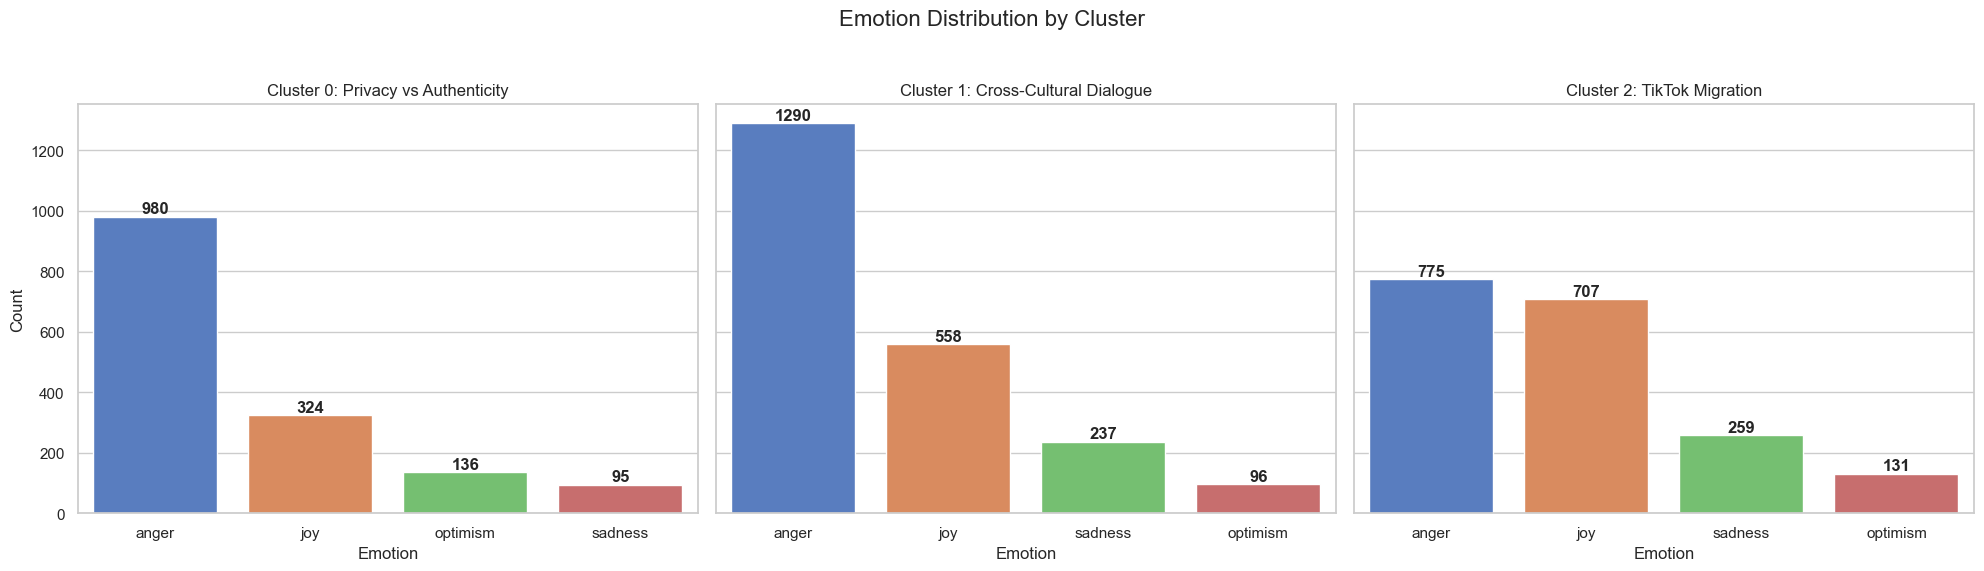

In [ ]:
# Set Seaborn style for all plots
sns.set(style="whitegrid")

# Visualization 1: Emotion Distribution by Cluster (Barplots)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for ax, (cluster_name, df) in zip(axes, clusters.items()):
    emotion_counts = df['emotion'].value_counts()
    sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="muted", ax=ax)
    ax.set_title(cluster_name)
    ax.set_xlabel("Emotion")
    ax.set_ylabel("Count")
    for i, count in enumerate(emotion_counts.values):
        ax.text(i, count + 1, str(count), ha='center', va='bottom', fontweight='bold')
plt.suptitle("Emotion Distribution by Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The Figure Word Clouds by Emotion display high-frequency word clouds across different emotional categories within the three main themes (clusters), offering a closer look at users' emotional focus and concerns around RedNote's functionality, cultural positioning, and platform migration.

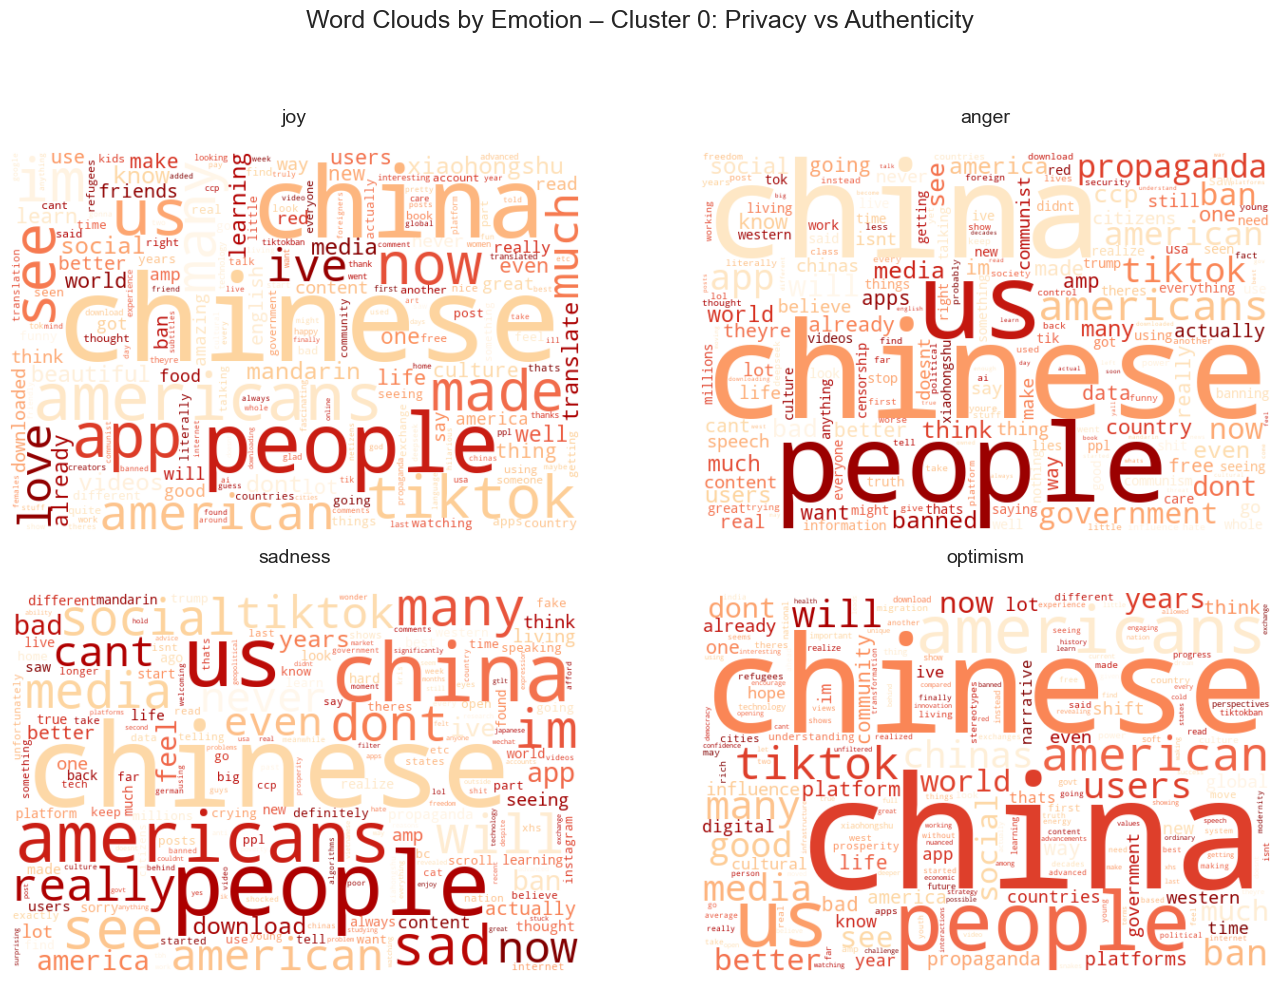

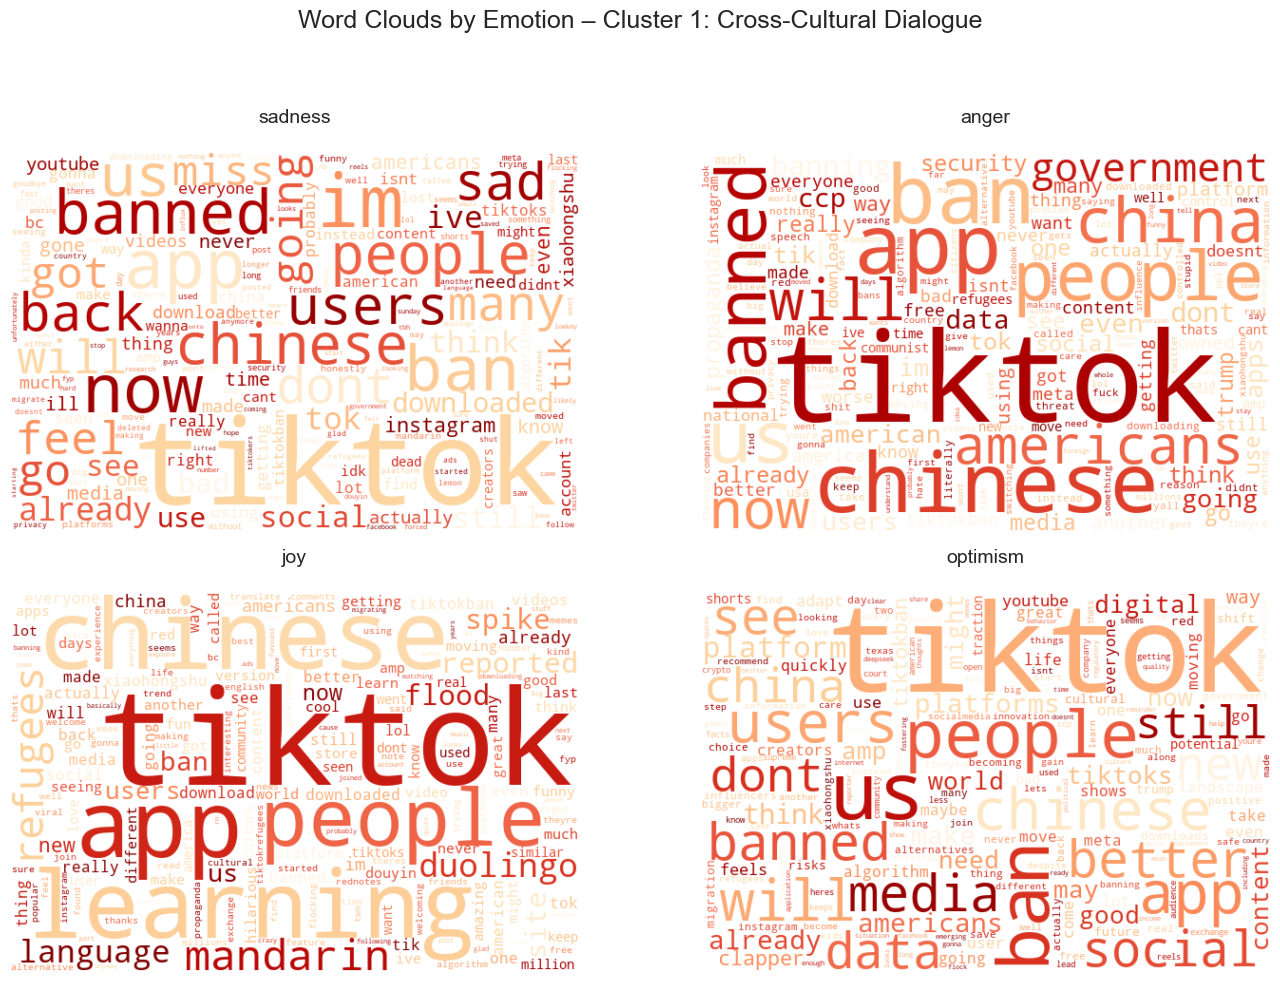

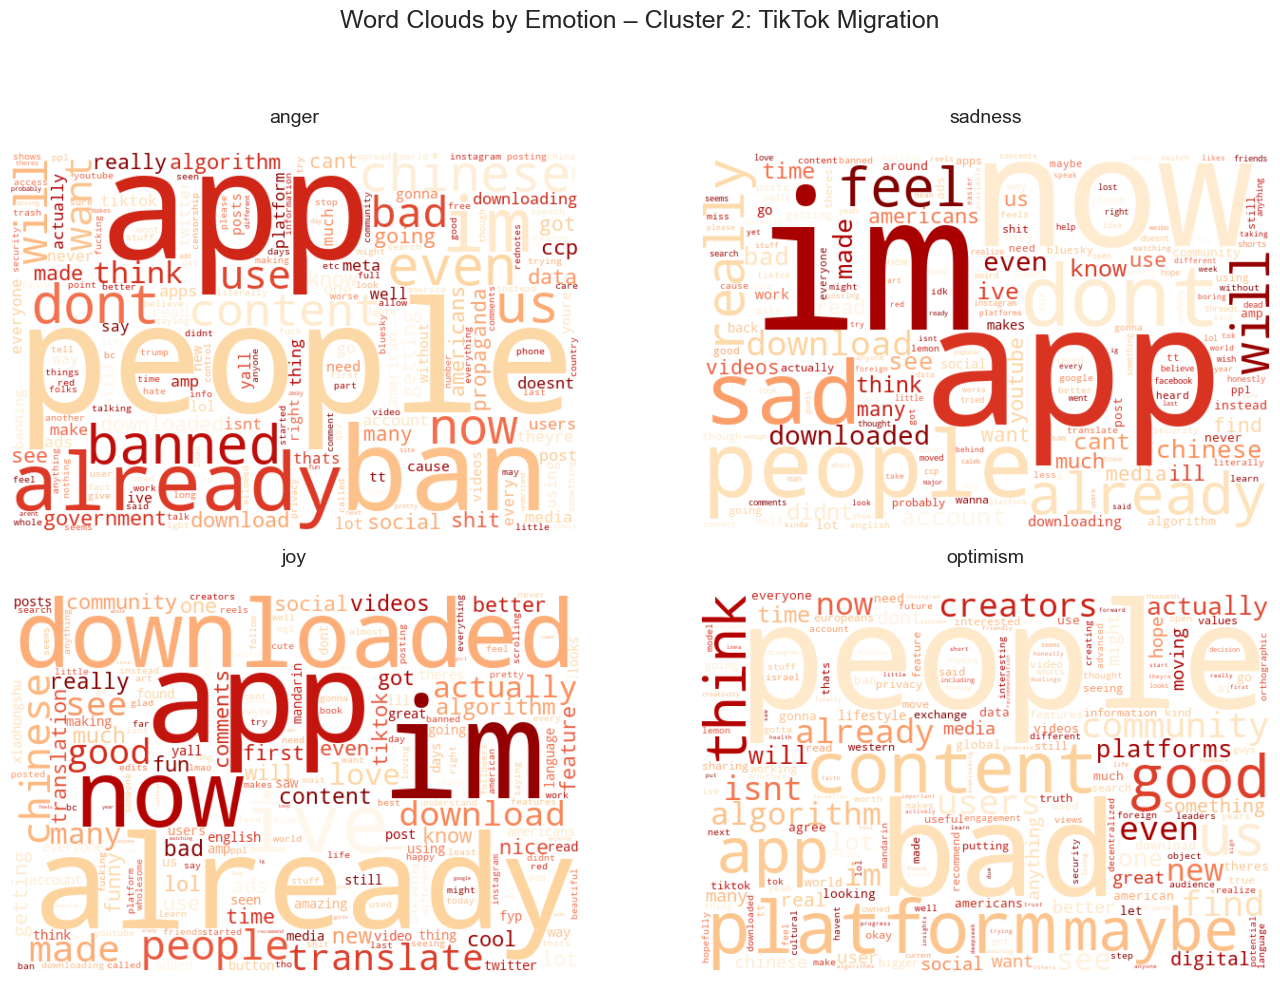

In [ ]:
# Visualization 2: Word Clouds by Emotion for Each Cluster
def clean_and_tokenize_for_wordcloud(text):
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    words = text.lower().split()
    stop = set(STOPWORDS)
    stop.update(['rednote'])
    return [word for word in words if word not in stop and len(word) > 1]

for cluster_name, df in clusters.items():
    emotion_categories = df['emotion'].dropna().unique()
    n = len(emotion_categories)
    cols = 2
    rows = (n + 1) // 2
    plt.figure(figsize=(14, 5 * rows))
    for idx, emotion in enumerate(emotion_categories, 1):
        texts = df[df['emotion'] == emotion]['Text'].dropna().tolist()
        all_words = []
        for text in texts:
            all_words.extend(clean_and_tokenize_for_wordcloud(text))
        word_freq = Counter(all_words)
        wc = WordCloud(width=600, height=400, background_color='white', colormap='OrRd').generate_from_frequencies(word_freq)
        plt.subplot(rows, cols, idx)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"\n{emotion}\n", fontsize=14)
    plt.suptitle(f"Word Clouds by Emotion – {cluster_name}", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Based on the Figure Keyword Sentiment Summary, distinct emotional patterns emerge across different user interest themes, revealing specific pain points and potential opportunities.

Within the theme of **"Privacy vs. Authenticity"**, users express strong anger toward keywords such as **'download', 'content' and 'platform'**, reflecting deep concerns over **data control, transparency, and content mechanisms**. To address this, the platform should enhance the **visibility of feature settings and give users more autonomy to reduce anxiety**.
In the **"Cross-Cultural Dialogue"** cluster, keywords like **'american', 'propaganda' and 'media'** are strongly associated with negative emotions, suggesting that **politically sensitive content** can lead to cultural friction. This highlights the need for **more nuanced content moderation and neutrality in international content dissemination**. Notably, the keyword **'culture' and 'translate'** stands out with a predominantly positive (joyful) sentiment, indicating that **language features are well-received and can serve as valuable tools for bridging cultural gaps.**

Meanwhile, in the **"TikTok Migration"** cluster, discussions around **'ban' and 'app'** are dominated by anger, underscoring dissatisfaction with the **technical and onboarding experience** among migrated users. However, keywords such as **'community' and 'platform'** evoke joy and optimism, suggesting that aspects of the platform's ecosystem are gaining user acceptance.


In [ ]:
# Define keywords by cluster and type
cluster_keywords = {
    0: {
        'feature': ['algorithm', 'account', 'download', 'content', 'search'],
        'ecosystem': ['privacy', 'authentic', 'community', 'platform', 'trust']
    },
    1: {
        'feature': ['translate', 'media', 'post', 'content'],
        'ecosystem': ['culture', 'propaganda', 'dialogue', 'american', 'bias']
    },
    2: {
        'feature': ['download', 'platform', 'app', 'recommendation', 'users'],
        'ecosystem': ['ban', 'migrate', 'authentic', 'freedom', 'community']
    }
}

# Map each cluster ID to its corresponding DataFrame
cluster_dfs = {
    0: cluster_0,
    1: cluster_1,
    2: cluster_2
}

# Store sentiment results
results = []

# Process each cluster individually
for cluster_id, keyword_dict in cluster_keywords.items():
    cluster_df = cluster_dfs[cluster_id]

    for ktype in ['feature', 'ecosystem']:
        for kw in keyword_dict[ktype]:
            matched_df = cluster_df[cluster_df['Text'].str.contains(kw, case=False, na=False)]
            emotion_counts = Counter(matched_df['emotion'])
            total = sum(emotion_counts.values())

            results.append({
                'Cluster': cluster_id,
                'Keyword': kw,
                'Type': ktype,
                'Anger': emotion_counts.get('anger', 0),
                'Joy': emotion_counts.get('joy', 0),
                'Sadness': emotion_counts.get('sadness', 0),
                'Optimism': emotion_counts.get('optimism', 0),
                'Total Mentions': total,
                'Dominant Emotion': max(emotion_counts, key=emotion_counts.get) if emotion_counts else 'None'
            })

# Convert results to DataFrame
keyword_sentiment_df = pd.DataFrame(results)

# Split into 3 cluster-specific DataFrames and sort by Total Mentions
cluster0_df = keyword_sentiment_df[keyword_sentiment_df['Cluster'] == 0].sort_values(by='Total Mentions', ascending=False)
cluster1_df = keyword_sentiment_df[keyword_sentiment_df['Cluster'] == 1].sort_values(by='Total Mentions', ascending=False)
cluster2_df = keyword_sentiment_df[keyword_sentiment_df['Cluster'] == 2].sort_values(by='Total Mentions', ascending=False)

# Display results
print("\nCluster 0 Keyword Sentiment Summary:")
display(cluster0_df)

print("\nCluster 1 Keyword Sentiment Summary:")
display(cluster1_df)

print("\nCluster 2 Keyword Sentiment Summary:")
display(cluster2_df)



Cluster 0 Keyword Sentiment Summary:


Cluster    Keyword       Type  Anger  Joy  Sadness  Optimism  \
2        0   download    feature     67   30       10         6   
8        0   platform  ecosystem     39   12        6        17   
3        0    content    feature     42   14        6         5   
1        0    account    feature     32   15        4         0   
7        0  community  ecosystem     16   10        2         8   
4        0     search    feature     16    6        4         2   
0        0  algorithm    feature     16    5        3         1   
9        0      trust  ecosystem     12    1        2         4   
5        0    privacy  ecosystem      9    1        1         0   
6        0  authentic  ecosystem      4    2        1         1   

   Total Mentions Dominant Emotion  
2             113            anger  
8              74            anger  
3              67            anger  
1              51            anger  
7              36            anger  
4              28            anger  
0              25            anger  
9              19            anger  
5              11            anger  
6               8            anger


Cluster 1 Keyword Sentiment Summary:


Cluster     Keyword       Type  Anger  Joy  Sadness  Optimism  \
17        1    american  ecosystem    270   79       21        10   
11        1       media    feature     92   33       11        13   
13        1     content    feature     59   31        8         5   
15        1  propaganda  ecosystem     90   11        0         1   
12        1        post    feature     58   21       15         1   
14        1     culture  ecosystem     19   14        3         2   
10        1   translate    feature     10    9        1         2   
16        1    dialogue  ecosystem      1    0        0         0   
18        1        bias  ecosystem      1    0        0         0   

    Total Mentions Dominant Emotion  
17             380            anger  
11             149            anger  
13             103            anger  
15             102            anger  
12              95            anger  
14              38            anger  
10              22            anger  
16               1            anger  
18               1            anger


Cluster 2 Keyword Sentiment Summary:


Cluster         Keyword       Type  Anger  Joy  Sadness  Optimism  \
21        2             app    feature    215  127       54        22   
19        2        download    feature    119  132       45        10   
24        2             ban  ecosystem    211   50       15         9   
20        2        platform    feature     39   13        7        21   
28        2       community  ecosystem     13   27        9        11   
23        2           users    feature     28   17        3         8   
27        2         freedom  ecosystem     11    1        1         1   
22        2  recommendation    feature      1    7        0         2   
25        2         migrate  ecosystem      2    3        1         1   
26        2       authentic  ecosystem      1    0        1         2   

    Total Mentions Dominant Emotion  
21             418            anger  
19             306              joy  
24             285            anger  
20              80            anger  
28              60              joy  
23              56            anger  
27              14            anger  
22              10              joy  
25               7              joy  
26               4         optimism

The Figure Daily Emotion Ratio Over Time further reveals clear emotional fluctuations across different dates, highlighting users' **sensitivity to platform-related events**. Around **January 19**, several U.S. states began pushing for TikTok bans, triggering a wave of user migration to Rednote. This shift led to a spike in anger within the TikTok Migration cluster. On **January 27**, Rednote updated its privacy policy, which sparked mixed reactions—concerns and disappointment from some users, but also positive anticipation toward the new rules. This resulted in a rise of both sadness and optimism within the Privacy vs. Authenticity cluster. **By February 9,** anger levels dropped across several themes, possibly due to a shift in discussion topics or sampling fluctuations.


These trends suggest that users are **highly responsive to both platform management decisions and external events**. In the Privacy vs. Authenticity theme, the policy update triggered a complex emotional response marked by both concern and cautious optimism. The Cross-Cultural Dialogue theme, while predominantly angry, also saw a rebound in positive emotions, indicating some **openness toward cultural exchange**. Meanwhile, the **TikTok Migration theme recorded the most intense anger**, clearly influenced by the ban and related disruptions. Overall, RedNote should prioritize **transparency in privacy practices, cultural adaptability, and a smooth user migration experience** to reduce emotional friction and foster a more positive community atmosphere.

<Figure size 1200x600 with 0 Axes>

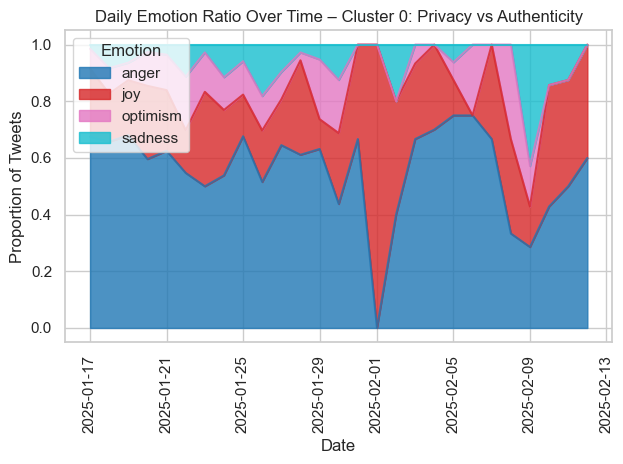

<Figure size 1200x600 with 0 Axes>

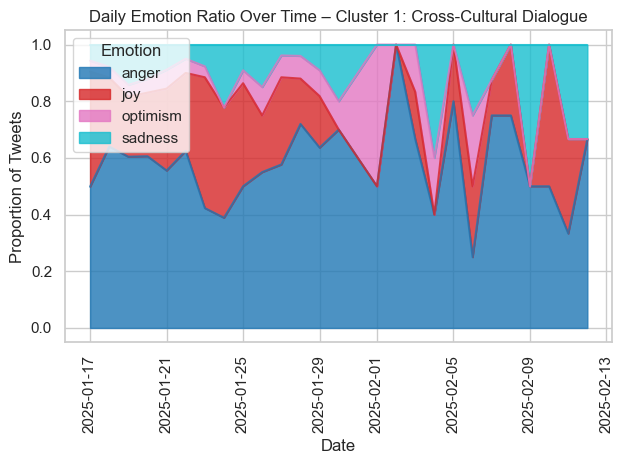

<Figure size 1200x600 with 0 Axes>

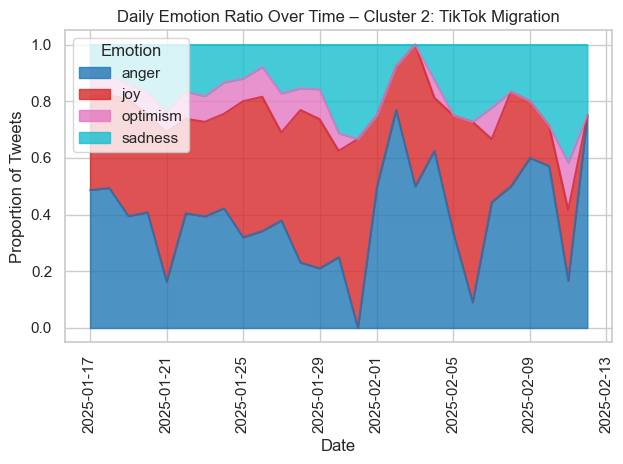

In [ ]:
# Visualization 3: Daily Emotion Ratio Over Time (Stacked Area Chart)
emotion_by_day = {}
for name, df in clusters.items():
    emotion_by_day[name] = df.groupby(['date', 'emotion']).size().unstack(fill_value=0)

for title, df_emotion in emotion_by_day.items():
    emotion_ratio = df_emotion.div(df_emotion.sum(axis=1), axis=0)
    plt.figure(figsize=(12, 6))
    emotion_ratio.plot.area(colormap='tab10', alpha=0.8)
    plt.title(f"Daily Emotion Ratio Over Time – {title}")
    plt.xlabel("Date")
    plt.ylabel("Proportion of Tweets")
    plt.xticks(rotation=90)
    plt.legend(title="Emotion", loc='upper left')
    plt.tight_layout()
    plt.show()


To better understand the intensity behind users' emotional expressions, we calculated the **average confidence scores** from the sentiment model across the three main themes. As shown in the Figure Average Emotion Strength By Cluster, **anger** not only appeared most frequently but also registered the highest intensity across all topics: it peaked at **0.85** in Cross-Cultural Dialogue, followed by **0.83** in Privacy vs. Authenticity and **0.81** in TikTok Migration. This suggests that users expressed particularly **strong dissatisfaction when it came to issues such as national identity, content censorship, and platform transitions.**


In contrast, **joy** stood out most in the TikTok Migration theme **(0.80)**, and also reached a notable 0.71 in Cross-Cultural Dialogue. These values reflect that some users responded positively to Rednote in the context of exploring **new platforms or engaging with diverse cultural contents**. It highlights the platform's potential to further strengthen its cross-cultural appeal through features like **curated cultural tags or enhanced language support tools.**


On the other hand, **optimism** showed the lowest average intensity across all three themes, with the **lowest score in Cross-Cultural Dialogue at just 0.57**. This pattern indicates a lack of strong confidence among users regarding the platform's future direction or stability, especially in **light of ongoing changes.** To rebuild trust and foster a more positive user outlook, RedNote could focus on **improving privacy transparency, nurturing a more welcoming community environment, and guiding users through transitions with clearer communication and support.**


C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\1249029573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_emotion_strength.index, y=avg_emotion_strength.values, palette="muted", ax=ax)
C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\1249029573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_emotion_strength.index, y=avg_emotion_strength.values, palette="muted", ax=ax)
C:\Users\Sherlock Pi\AppData\Local\Temp\ipykernel_12400\1249029573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_emotion_streng

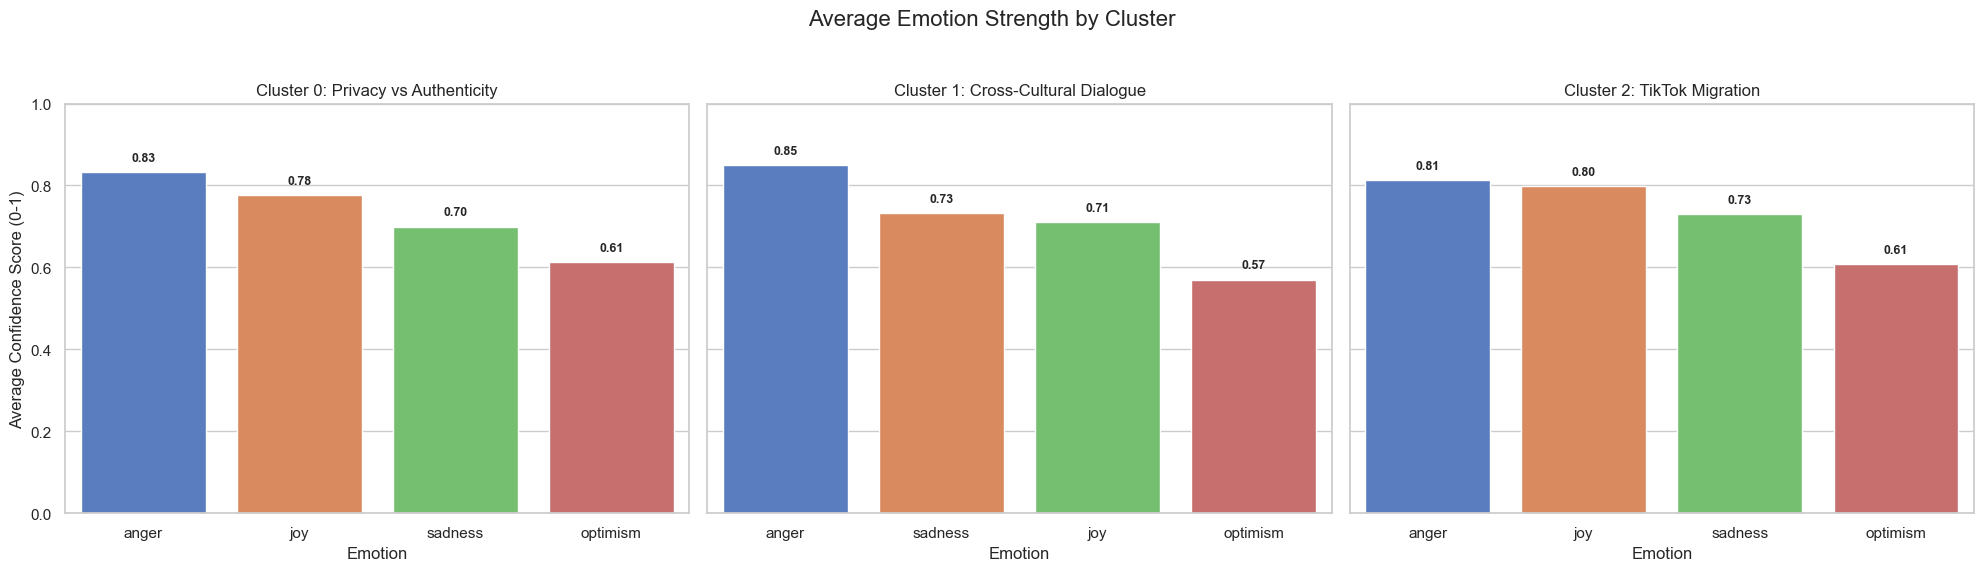

In [ ]:
# Visualization 4: Average Emotion Strength by Cluster (Barplot)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for ax, (name, df) in zip(axes, clusters.items()):
    avg_emotion_strength = df.groupby('emotion')['emotion_score'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_emotion_strength.index, y=avg_emotion_strength.values, palette="muted", ax=ax)
    ax.set_title(name)
    ax.set_ylabel("Average Confidence Score (0-1)")
    ax.set_xlabel("Emotion")
    ax.set_ylim(0, 1)
    for i, v in enumerate(avg_emotion_strength.values):
        ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.suptitle("Average Emotion Strength by Cluster", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

To explore whether certain emotions are more likely to lead to **offensive expressions**, we constructed heatmaps of **Emotion vs Offensive** and analyzed them across three topics. This helps assess the level of rationality in users' emotional expressions and provides insights for Rednote's risk assessment and community management strategies.

**Anger is the emotion most likely to co-occur with offensive language.** In particular, topic 3 shows the highest rate, with 28% of anger-related tweets labeled as offensive. This suggests that sensitive issues like platform migration or policy changes are more prone to triggering intense user reactions. RedNote should pay special attention to these high-risk discussion points in its international operations and strengthen its response mechanisms.

**Sadness also shows a moderate tendency toward offensive expression (about 9–12%)**. This may reflect users' frustration or helplessness when encountering negative platform experiences, such as privacy policy changes or account restrictions. This highlights the importance of emotional guidance and empathetic communication when addressing user feedback.

**Positive emotions such as joy and optimism are rarely associated with offensive content** especially in Topic 3 where only 1% of positive emotion tweets were offensive. This indicates that when users have a better experience with the platform or during the migration process, their expressions tend to be more rational and friendly.

Although anger carries a higher potential for offensive language, **most users still maintain restraint when expressing dissatisfaction.** This presents a positive signal for RedNote's international communication: emotions can be guided and managed. **The platform should continue to enhance content quality, refine community guidelines, and improve cultural adaptability, helping transform emotions into constructive feedback and reducing the likelihood of aggressive discourse.**


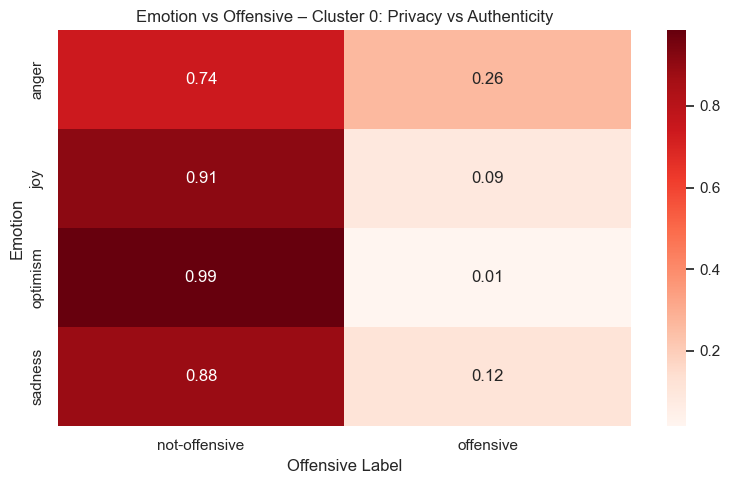

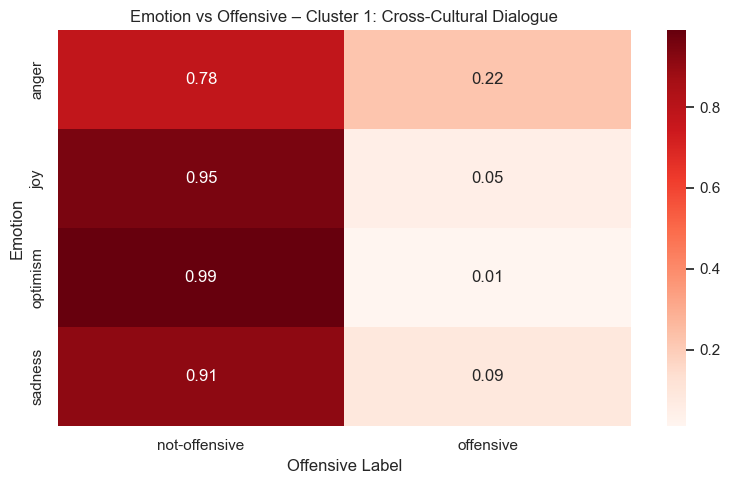

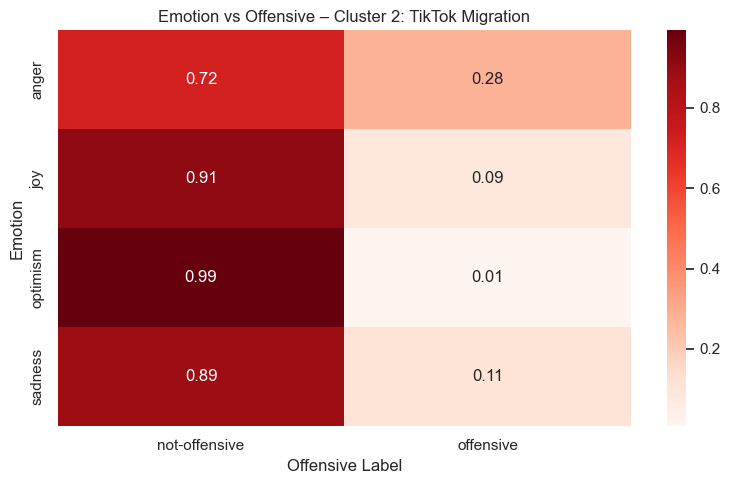

In [ ]:
# Visualization 5: Heatmap for Emotion vs Offensive Label
for name, df in clusters.items():
    ctab = pd.crosstab(df['emotion'], df['offensive_label'], normalize='index')
    plt.figure(figsize=(8, 5))
    sns.heatmap(ctab, annot=True, cmap='Reds', fmt='.2f')
    plt.title(f"Emotion vs Offensive – {name}")
    plt.ylabel("Emotion")
    plt.xlabel("Offensive Label")
    plt.tight_layout()
    plt.show()

These six WordClouds Figures reveal patterns of **hate speech and offensive languag**e across three topics related to TikTok migration. Users express concerns about RedNote's **national ties, censorship, cultural bias and migration experience**. They often using identity or appearance-related slurs. To address this, RedNote should **improve transparency, promote inclusive dialogue and optimize onboarding to ease tensions and foster trust.**

The top 5 highest rated tweets from each topic in each task are shown in the appendix.


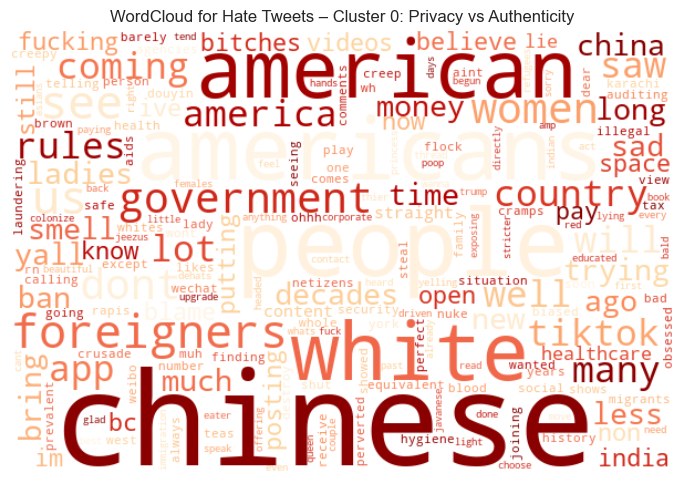

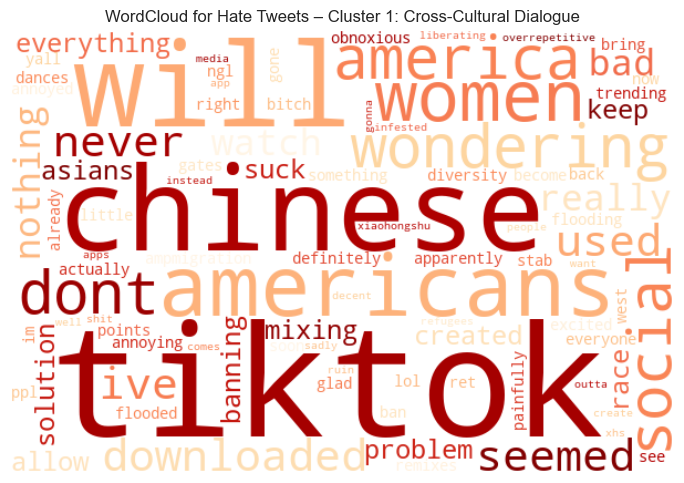

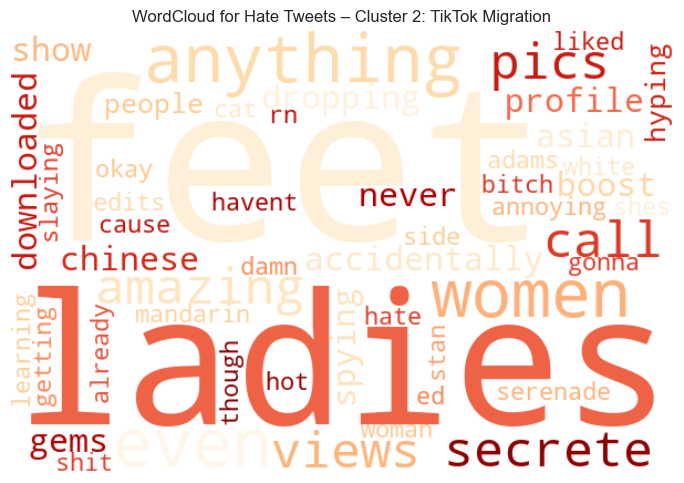

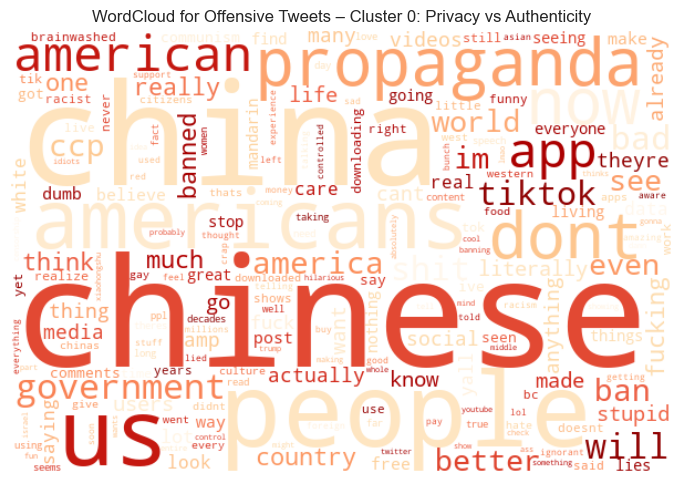

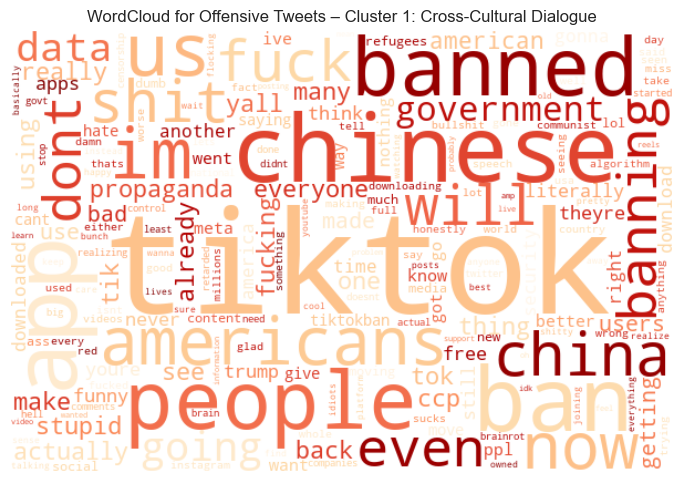

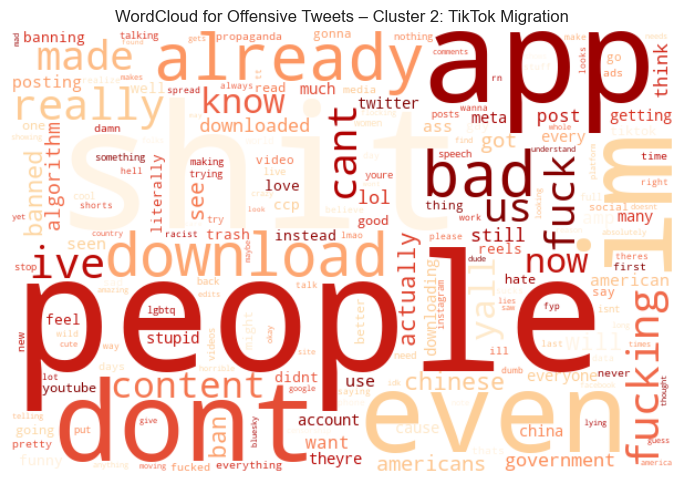

In [ ]:
# Visualization 6: Word Clouds for Hate and Offensive Tweets
def clean_text_for_wordcloud(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.lower().split()
    stop = set(WordCloud().stopwords)
    stop.update(['rednote'])
    return [word for word in words if word not in stop and len(word) > 1]

for task in ['hate', 'offensive']:
    for name, df in clusters.items():
        selected_texts = df[df[f"{task}_label"] == task]['Text'].dropna().tolist()
        words = []
        for text in selected_texts:
            words.extend(clean_text_for_wordcloud(text))
        word_freq = Counter(words)
        wc = WordCloud(width=600, height=400, background_color='white', colormap='OrRd').generate_from_frequencies(word_freq)
        plt.figure(figsize=(7, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for {task.title()} Tweets – {name}")
        plt.tight_layout()
        plt.show()

# 7. Actionable Recommendations

Based on the sentiment analysis and keyword insights, several actionable directions for product optimization emerge. To address users' concerns about **data transparency and control**, the platform should enhance the **visibility of privacy settings**, ensure **fairness** in content **recommendation algorithms** and build **trust** through **community-driven operations.** In the context of **cross-cultural dialogue**, it is essential to improve **cultural adaptability** such as **refining recommendation categories and tags**. Also need to strengthen **translation and content preview features** to avoid **cultural or political misinterpretation**. Additionally, to respond to **frustrations** arising from the TikTok migration, the platform should streamline the **onboarding process** by **reducing friction during download and login**, further **leverage its content recommendation strengths**, and improve the **first-time user experience** to foster **long-term user satisfaction and loyalty.**


# 8. Limitations
Our limitations mainly fall into two categories: **data acquisition and model selection.**

For data acquisition, due to **data privacy restrictions** on the RedNote platform, we were unable to directly access user comments from RedNote itself. As an alternative, we **collected tweets and replies containing the keyword “RedNote”** from the **X platform** to serve as our research dataset. However, this approach also comes with certain limitations as the discussions about “RedNote” on X may **not fully reflect the actual experiences or opinions of real RedNote users.** The tweets may come more from **observers, media commentators or non-active users** rather than from individuals with direct usage experience. On the other hand, **differences in language, culture and platform** behavior may lead to **discrepancies** between Twitter content and native user comments on the RedNote platform. Additionally, due to **time and budget constraints**, the tweets and comments we collected from Platform X only cover the period from **January 17 to February 12**. This relatively limited timeframe may not fully capture users' **long-term experiences with RedNote** or their **reactions to specific moments like feature updates**. Given the time-sensitive and dynamic nature of discussions on social media, the dataset may lack representativeness over a broader temporal context.

For filtering out irrelevant tweets model selection, we selected the BERTweet-Base model primarily due to its reasonable runtime and computational efficiency especially when compared to larger and more resource-intensive models like DeepSeek V3. However, the best F1 score achieved during fine-tuning was approximately **0.5**, indicating **only moderate predictive performance in distinguishing relevant tweets.** This lower accuracy means **some irrelevant tweets may remain**, **while some relevant ones might be missed**. As a result, this limitation may affect the precision and reliability of topic modeling and sentiment analysis tasks.

# 9. Reference

Maheshwari, S. and Holpuch, A. (2025). “Why TikTok Is Facing a U.S. Ban, and What Could Happen Next”, New York Times, 17 January. Avaiable at: https://www.nytimes.com/article/tiktok-ban.html (Accessed: 31 January, 2025).

Murphy, H. and Sevastopulo, D. (2025). “TikTok goes dark across US”, Financial Times, 14 January. Avaiable at: https://www.ft.com/content/877e18ec-23d4-483c-91ad-300e63e0d2d6 (Accessed: 31 January, 2025).

Murphy, H., Palma S. and Sevastopulo, D. (2024). “TikTok fails to halt law that could lead to US ban”, Financial Times, 6 December. Avaiable at: https://www.ft.com/content/bfc931a5-0ee1-47a4-b95a-2cee5abf7f6c (Accessed: 31 January, 2025).

Olcott, E. (2025). “US TikTok ‘refugees’ make surprise move to China’s ‘RedNote’”, Financial Times, 14 January. Avaiable at: https://www.ft.com/content/6dcbc9c1-ec7f-4a5a-b956-6904a5580d07 (Accessed: 31 January, 2025).

The Conversation (2024) What’s happening on RedNote? A media scholar explains the app TikTok users are fleeing to – and the cultural moment unfolding there. Available at: https://theconversation.com/whats-happening-on-rednote-a-media-scholar-explains-the-app-tiktok-users-are-fleeing-to-and-the-cultural-moment-unfolding-there-247621 [Accessed 29 Mar. 2025].

# 10. Appendice

In [ ]:
# Display Top 5 Tweets per Task for Each Cluster
for task in tasks:
    print(f"\nTop 5 tweets for task: {task.upper()}")
    for name, df in clusters.items():
        top_df = df.sort_values(by=f"{task}_label_score", ascending=False).head(5)
        print(f"\n{name}")
        display(top_df[['Text', f"{task}_label", f"{task}_label_score"]])

# Save each cluster's DataFrame to an Excel file
for name, df in clusters.items():
    fname = name.replace(":", "").replace(" ", "_").lower()
    df.to_excel(f"{fname}_tweeteval_analysis.xlsx", index=False)


Top 5 tweets for task: HATE

Cluster 0: Privacy vs Authenticity


Text  \
22233      I'm not crying, you're crying 😭 \n\nThe #LiHua phenomenon over on #Rednote #Xiaohongshu is so precious and pure ✨\n\nExplainer on #LiHua ⬇️ here\n\n#TiktokRefugees are not lost and looking for a new home, they're returning home to their own #GlobalVillage   
46387  I have spent the past 2 days watching Chinese creators on #RedNote\n\nSeeing the sense of community that is greatly emphasized in China and the overall positive sense of well-being that many people there seem to have has been an amazing eye-opening experience   
13600                                                 I am doing this to help ppl abroad learn more about China and better understand stuff on #RedNote and other chinese media，I have been active in Chinese social media for about two years now https://t.co/N5i4CLAsL1   
46775                                                                                                                                     you downloaded rednote a week ago,, ive been tapped into chinese prosperity affirmation videos for years now we are not the same   
54006                                                                                 When you use #rednote #xiaohongshu AI Republic Helper is your best chrome extension assistant to help you translate the mandarin. Try it out today for free! https://t.co/1vGUw8IWE9   

      hate_label  hate_label_score  
22233   not-hate          0.994979  
46387   not-hate          0.993792  
13600   not-hate          0.993490  
46775   not-hate          0.992934  
54006   not-hate          0.992633


Cluster 1: Cross-Cultural Dialogue


Text  \
31007                                                                                                                                                                                                                                                                                          With many now ditching Tiktok, people in the US have started downloading the RedNote app, which is a Chinese app similar to Tiktok..... and one of them is Charlie Puth, who opened the app and highlighted "Left and Right" in the intro video https://t.co/swzpjXsaSr   
43762                                                                                                                                                                                                                                                                                               As someone with over 10,000+ followers on TikTok, my TikTok content is viewed by Americans and Canadians. Mainstream media is slow to catch on to news and trends, but RedNote/Xiaohongshu has been the #1 app on the Apple App Store in Canada since January 14th   
15968                                                                                                                                                                                                                                                                                                                            An American netizen on the Chinese app #RedNote has been deeply moved by the outpouring of supportive comments and concern from Chinese followers, particularly about his health and sleep habits. #tiktokban https://t.co/zekZss3VXa   
10814  A RedNote user shared her excitement about a new feature that allows direct comment translation within the app. She expressed gratitude to Chinese developers for easing the transition for "TikTok refugees" to other platforms. \n\nPreviously, external translation apps were needed for copying and pasting text. Now, the integrated feature simplifies understanding and participating in discussions. \n\nThe post appreciates technological progress and increased global accessibility in online communities.\n\n#RedNote #Xiaohongshu #tiktokrefugees   
7591                                                                                                                                                                                                                                                                                                                                                                                   In the days leading up to the TikTok ban in the U.S. on Sunday, U.S. users flooded the Chinese app RedNote, which offered a similar experience to their https://t.co/2KJOZ9594E   

      hate_label  hate_label_score  
31007   not-hate          0.994256  
43762   not-hate          0.993314  
15968   not-hate          0.993262  
10814   not-hate          0.993081  
7591    not-hate          0.992980


Cluster 2: TikTok Migration


Text  \
3982                                                                                                                                                                                                                     RedNote is the spiritual app 🙌 Community 🦄 Health🛕 abundance and well wishes 🌟 https://t.co/B2aQvOZJ0N   
9395   On Bluesky 🩵 &amp; Rednote ❤️\n\nThe energy, content, and community is growing with compassion and creativity with inclusion for all and i want to be a part of that.\n\nIt's been so emotionally draining on Meta &amp; Musk apps in the USA bc of our current politics 😓 but others care ✌🏻💖✊🏻 https://t.co/B3QAjga78F   
42001                                          It was my first time realizing how much RedNote (Xiaohongshu) values empathy, humanity, equality, and inclusivity - surprisingly, through a foreign #TTrefugee. I’ve never read a platform's rules seriously before, but RedNote is truly impressing me… https://t.co/sXMOv27oTp   
27164                                                                                                                                                                                                                Xiaohongshu/ RedNote has been the most downloaded free app on Apple's app store in the U.S. since Tuesday.   
45123                                                                                                                                                                           One of the top choices is Xiaohongshu, also known as RedNote in the U.S., which has climbed to the top of the App Store rankings \n\nThread 🧵 2   

      hate_label  hate_label_score  
3982    not-hate          0.994220  
9395    not-hate          0.994034  
42001   not-hate          0.993577  
27164   not-hate          0.993370  
45123   not-hate          0.993336


Top 5 tweets for task: OFFENSIVE

Cluster 0: Privacy vs Authenticity


Text  \
48786                       @ryansatin Absolutely 💯 agree!! But in a way, I'm glad it happened cause I've been on RedNote and I'm loving it so much there! The connection to the Chinese people has been amazing! I don't know how long it'll last, but I'll always remember it. It's been truly eye-opening, to say the least   
53408                                                                      Rednote really out here showing us how amazing and beautiful china is 😂 free Healthcare, healthier cheaper food, beautiful landscapes. I'm about to move to China thank you @JoeBiden and @KamalaHarris for making us download rednote 🙏🏽🙏🏽🙏🏽🙏🏽💙💙💙💙   
17404                                                                                                                                        @Kanthan2030 The colors are so vibrant and they are everywhere... Especially their food.  People really should take a look...\n#RedNote\n#GlobalVillagers https://t.co/SB9cJzv3yQ   
22232                                                                                                                                                             @KreekCraft rednote! The Chinese people are extremely welcoming and friendly, they added a translator to the app, and tons of US creators are already there!   
23436  @SenTomCotton @SenatorRicketts Thank you so much Senator. Opening us up to other options like Xiaohongshu has been so amazing. I was critical of your position at first but now that we are on Rednote, you did us a favor. I had no idea they were so much more advanced than our country. The tech is beyond amazing.   

      offensive_label  offensive_label_score  
48786   not-offensive               0.973743  
53408   not-offensive               0.970052  
17404   not-offensive               0.967755  
22232   not-offensive               0.966560  
23436   not-offensive               0.966331


Cluster 1: Cross-Cultural Dialogue


Text  \
5174                                                    @MiaoXiaojuan Welcome, TikTok friends! Excited to see new faces here. As someone who's built AI for social platforms, I believe RedNote's unique vibe will win you over. Hope you'll find a cozy spot in this community!   
20993                                                                  Tiktok is back! 🥹 I'll still be scrolling through rednote though because they welcomed us with open arms and already found recipes, unique fashion trends, and fact I didn't know about and other things!   
39883                                       @TheRealVerbz You are such an amazing talent. I just want to kindly remind you that the Rednote App has a "one-click import of tiktok archives" feature, which is very convenient. And your content will definitely be very popular.   
14111                                                                    6/ The TikTok migration to RedNote is bigger than we thought.\n\nDespite everything, we’re more similar than we think. Let’s enjoy the ride &amp; spread love along the way.\n\nhttps://t.co/pb9xR63UOP   
21529  @sinistermilf_ Stop! I love that for you! I’m so happy you were able to make an earning on tik tok 🥰 I wish I would have taken content creation more seriously before the ban 🥹 I was slowly steadily growing 😩 I just got on rednote and youtube to try my luck there 🥺💕   

      offensive_label  offensive_label_score  
5174    not-offensive               0.964183  
20993   not-offensive               0.963371  
39883   not-offensive               0.963183  
14111   not-offensive               0.963011  
21529   not-offensive               0.962956


Cluster 2: TikTok Migration


Text  \
43640                                                                                            i love rednote and it’s people, they’re so sweet and supportive of the adaptation and how to learn to use ☹️❤️❤️ https://t.co/T2mz6S0Z2P   
42642                                                                                                                       @Whiskey_Dingo Have you looked into rednote? The community is very welcoming over there. I’ve been loving it.   
28372                                                                                                                            @ShangguanJiewen Lovely! I already signed up to RedNote and I love it. I think I'll sign for Douyin too!   
4129   @Joy822049725991 @DcLidstone Its been amazing connecting with others abroad from UK sweden china iceland etc on tt and rednote and here! We appreciate all your love and support and it is time for all united to carry each other   
8670      @AwkwardBambooVT Me2🥺🥺❤️ I was checking ur rednote acc and so glad to see some many good taste ppl love you! So talented!!! Plz feel free to dm me if you need help with any platforms (I will keep searching ur bilibili acc 👀   

      offensive_label  offensive_label_score  
43640   not-offensive               0.977833  
42642   not-offensive               0.976424  
28372   not-offensive               0.975630  
4129    not-offensive               0.974444  
8670    not-offensive               0.973310


Top 5 tweets for task: IRONY

Cluster 0: Privacy vs Authenticity


Text  \
9668                                                                                                                                                                                                       All us Americans downloading rednote right before new year in china is gonna blow their minds.   
32748                                                                                                                                                                                  Rebranding to Libs of RedNote and posting about people denying Tiananmen? Sounds like a decent job I have to admit   
25566                                                                                                                                                                                   China must be so pumped that useful idiots like Coco Gauff are advertising switching to RedNote and saving TikTok   
22205                                                 does anyone have advice for how to start learning chinese? like where do u start with learning grammar and vocab etc? ofc tones too\n\ni tried to learn a while ago, but now that i use rednote i want to learn again, just not sure where to start   
48786  @ryansatin Absolutely 💯 agree!! But in a way, I'm glad it happened cause I've been on RedNote and I'm loving it so much there! The connection to the Chinese people has been amazing! I don't know how long it'll last, but I'll always remember it. It's been truly eye-opening, to say the least   

      irony_label  irony_label_score  
9668        irony           0.978388  
32748       irony           0.978294  
25566       irony           0.978066  
22205   non_irony           0.977795  
48786   non_irony           0.975819


Cluster 1: Cross-Cultural Dialogue


Text  \
37858                           lol banning tik tok and basically giving Meta a monopoly over social media then people choosing to go to RedNote is so funny to me   
47867                                                                                                Rednote not too bad! I can get with it but i’ma miss TikTok 😭   
29169                            Rednote is mid , insta is mid, X is mid, life as know it is over without tiktok. Adapting to these conditions is challenging 😥 😭🎀   
48500  The amazing thing about the Tiktok ban is that the American government have discovered they're going to have to start inventing excuses to ban Rednote too.   
36857                              It's good that the U.S. government has banned TikTok. Now people can choose another Chinese social media platform like RedNote.   

      irony_label  irony_label_score  
37858       irony           0.982068  
47867   non_irony           0.977427  
29169   non_irony           0.974632  
48500       irony           0.973521  
36857       irony           0.973353


Cluster 2: TikTok Migration


Text  \
54133                                                                                                    The rednote app being a trojan horse for a social media addicted society makes perfect sense   
6402                                                                                                                                                 Rednote is doing a great job spreading the truth   
22644  @ChaiseTattoos Honestly I’m not putting any stock into anything right now. I had rednote just to look around. I really don’t see it being down forever. Today very much feels like a rest day.   
4012                                                                                        @teacup_draws it's a-mido!! honestly i wish i had xiaohongshu/rednote tbh but i don't trust it at all ;-;   
25640                                                                                                                                               having a banner on rednote is the best thing ever   

      irony_label  irony_label_score  
54133       irony           0.987535  
6402        irony           0.984422  
22644   non_irony           0.980743  
4012    non_irony           0.980150  
25640       irony           0.979696